# Preprocessing data

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
csv_path = 'medianhousepricesforadministrativegeographies.csv'
df = pd.read_csv(csv_path)
df.columns = df.iloc[1]
df = df.iloc[2:]
print(df.shape)

(192, 118)


In [270]:
df = df.drop(['Region/Country code','County code','Region/Country name'], axis=1).dropna()

In [271]:
df = df.melt(id_vars=['County name'], var_name='Year', value_name='House Price')
df['Year'] = df['Year'].str.replace('Year ending ', '', regex=False)
df

County name      Year House Price
0                Hartlepool  Dec 1995     36,500 
1             Middlesbrough  Dec 1995     40,000 
2      Redcar and Cleveland  Dec 1995     43,000 
3          Stockton-on-Tees  Dec 1995     45,250 
4                Darlington  Dec 1995     44,000 
...                     ...       ...         ...
12991               Torfaen  Mar 2024    180,000 
12992         Monmouthshire  Mar 2024    312,500 
12993               Newport  Mar 2024    218,250 
12994                 Powys  Mar 2024    230,000 
12995        Merthyr Tydfil  Mar 2024    137,000 

[12996 rows x 3 columns]

In [272]:
counties = df['County name'].unique()
print(counties)
print(len(counties))

['Hartlepool' 'Middlesbrough' 'Redcar and Cleveland' 'Stockton-on-Tees'
 'Darlington' 'County Durham' 'Northumberland' 'Tyne and Wear' 'Halton'
 'Warrington' 'Blackburn with Darwen' 'Blackpool' 'Cheshire East'
 'Cheshire West and Chester' 'Cumberland' 'Westmorland and Furness'
 'Lancashire' 'Greater Manchester' 'Merseyside'
 'Kingston upon Hull, City of' 'East Riding of Yorkshire'
 'North East Lincolnshire' 'North Lincolnshire' 'York' 'North Yorkshire'
 'South Yorkshire' 'West Yorkshire' 'Derby' 'Leicester' 'Rutland'
 'Nottingham' 'North Northamptonshire' 'West Northamptonshire'
 'Derbyshire' 'Leicestershire' 'Lincolnshire' 'Nottinghamshire'
 'Herefordshire, County of' 'Telford and Wrekin' 'Stoke-on-Trent'
 'Shropshire' 'Staffordshire' 'Warwickshire' 'Worcestershire'
 'West Midlands' 'Peterborough' 'Luton' 'Southend-on-Sea' 'Thurrock'
 'Bedford' 'Central Bedfordshire' 'Cambridgeshire' 'Essex' 'Hertfordshire'
 'Norfolk' 'Suffolk' 'Inner London' 'Outer London' 'Medway'
 'Bracknell Forest

In [273]:
df[df['County name'] == 'Hartlepool']

County name      Year House Price
0      Hartlepool  Dec 1995     36,500 
114    Hartlepool  Mar 1996     37,500 
228    Hartlepool  Jun 1996     38,500 
342    Hartlepool  Sep 1996     39,000 
456    Hartlepool  Dec 1996     40,000 
...           ...       ...         ...
12426  Hartlepool  Mar 2023    148,098 
12540  Hartlepool  Jun 2023    146,250 
12654  Hartlepool  Sep 2023    145,000 
12768  Hartlepool  Dec 2023    139,975 
12882  Hartlepool  Mar 2024    137,725 

[114 rows x 3 columns]

In [274]:
# Extract only years from 'Month Year' labels
df['Year'] = pd.to_datetime(df['Year'], format='%b %Y')  
df['House Price'] = df['House Price'].str.replace(',', '').str.strip() 
df['House Price'] = df['House Price'].astype(float) 

In [275]:
df_copy = df.copy()

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Change year and month into integer 
df['Year'] = np.array(df_copy['Year'].dt.year)  
df['Month'] = np.array(df_copy['Year'].dt.month)  
df_test = df.copy()
df

County name  Year  House Price  Month
0                Hartlepool  1995      36500.0     12
1             Middlesbrough  1995      40000.0     12
2      Redcar and Cleveland  1995      43000.0     12
3          Stockton-on-Tees  1995      45250.0     12
4                Darlington  1995      44000.0     12
...                     ...   ...          ...    ...
12991               Torfaen  2024     180000.0      3
12992         Monmouthshire  2024     312500.0      3
12993               Newport  2024     218250.0      3
12994                 Powys  2024     230000.0      3
12995        Merthyr Tydfil  2024     137000.0      3

[12996 rows x 4 columns]

In [277]:
df_linear = df.copy()
df_linear

County name  Year  House Price  Month
0                Hartlepool  1995      36500.0     12
1             Middlesbrough  1995      40000.0     12
2      Redcar and Cleveland  1995      43000.0     12
3          Stockton-on-Tees  1995      45250.0     12
4                Darlington  1995      44000.0     12
...                     ...   ...          ...    ...
12991               Torfaen  2024     180000.0      3
12992         Monmouthshire  2024     312500.0      3
12993               Newport  2024     218250.0      3
12994                 Powys  2024     230000.0      3
12995        Merthyr Tydfil  2024     137000.0      3

[12996 rows x 4 columns]

# Model training (Linear Regression)

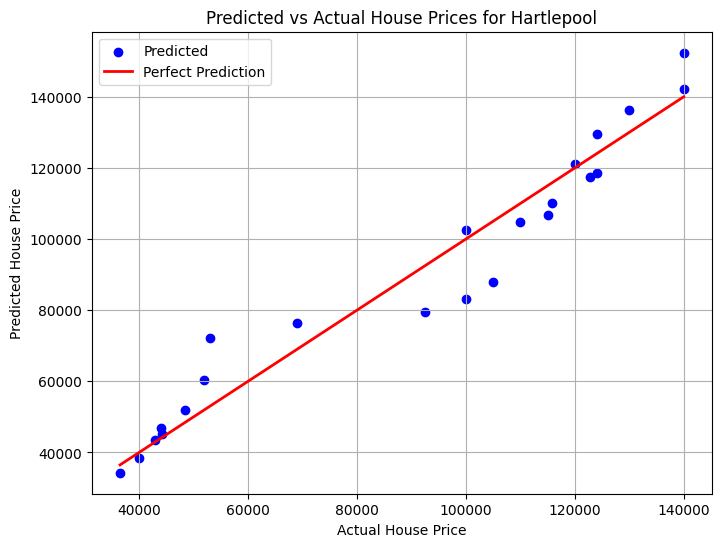

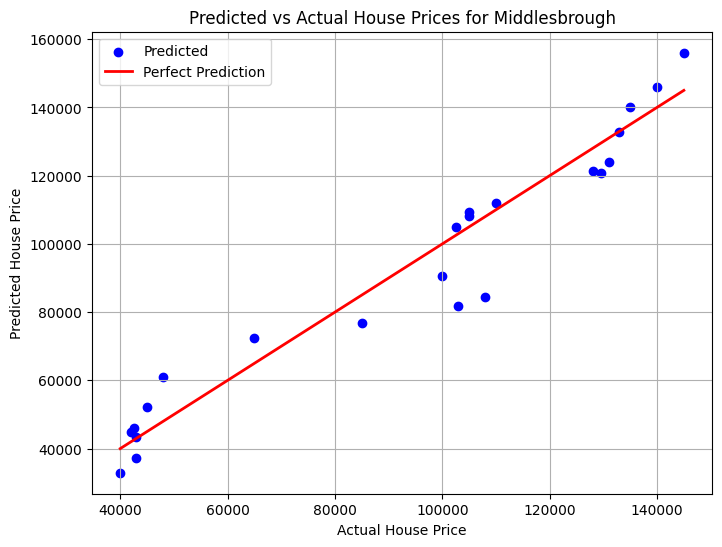

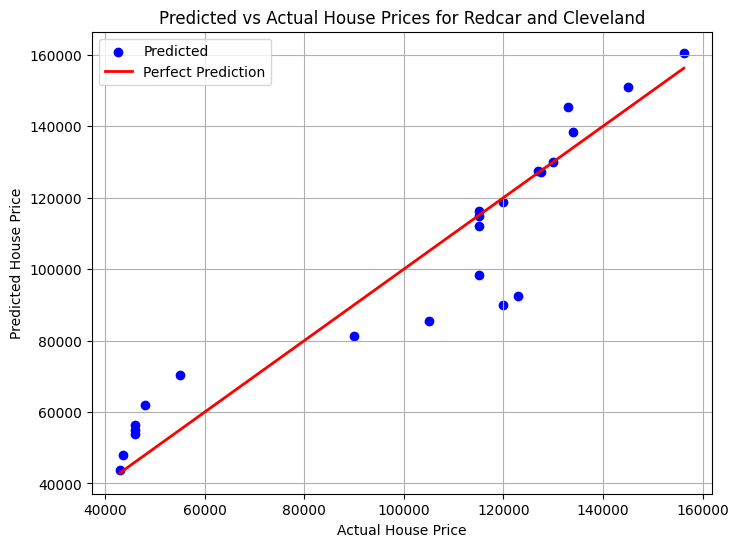

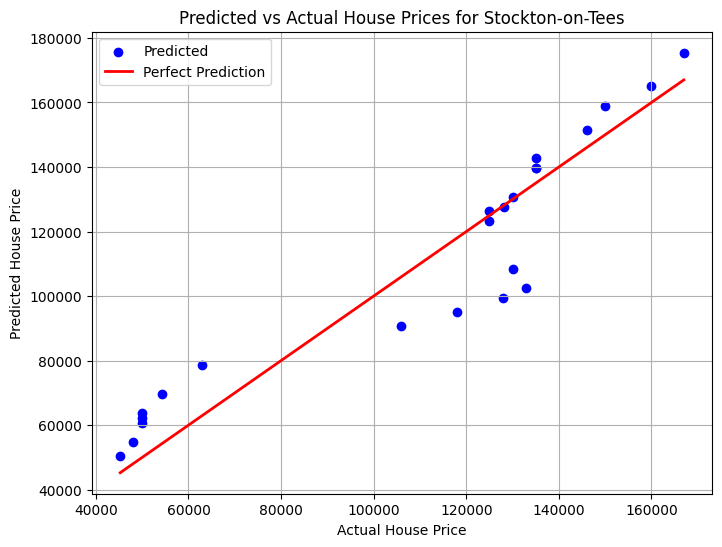

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

label_encoder_linear = LabelEncoder()
df_linear['County name'] = label_encoder_linear.fit_transform(df_linear['County name'])

# Regression modeling: XGBoost regression
models = {}
predictions = {}
count = 0
for county in df_linear['County name'].unique():
    # Data for the specific county
    county_data = df_linear[df_linear['County name'] == county]

    # Split into training and testing sets
    X_county = county_data[['Year', 'Month']]
    y_county = county_data['House Price']

    # Split data to 80% train and 20% test 
    X_train, X_test, y_train, y_test = train_test_split(X_county, y_county, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)  
    models[county] = model
    predictions[county] = model.predict(X_test)

    if count <= 3:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, predictions[county], color='blue', label='Predicted')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
        plt.title(f'Predicted vs Actual House Prices for {label_encoder_linear.inverse_transform([county])[0]}')
        plt.xlabel('Actual House Price')
        plt.ylabel('Predicted House Price')
        plt.legend()
        plt.grid()
        plt.show()
    count+=1

# Model training (XGBRegressor)

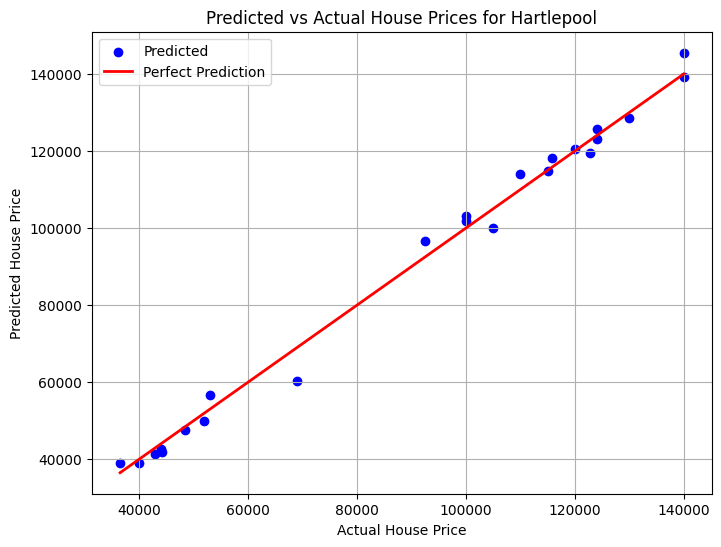

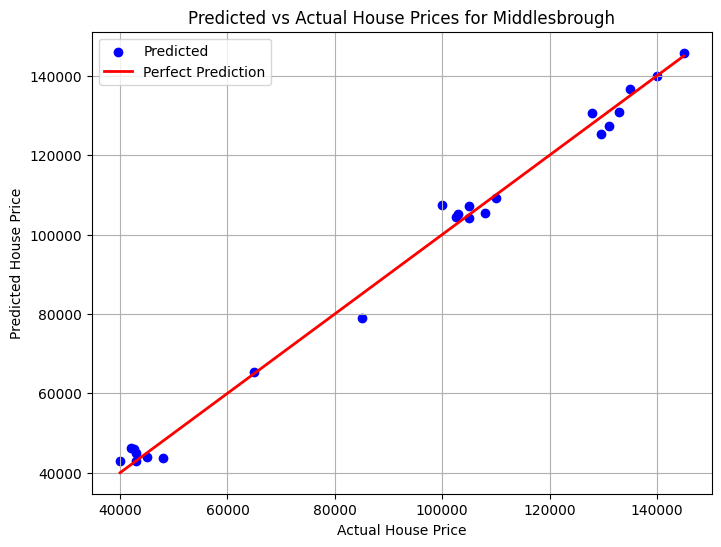

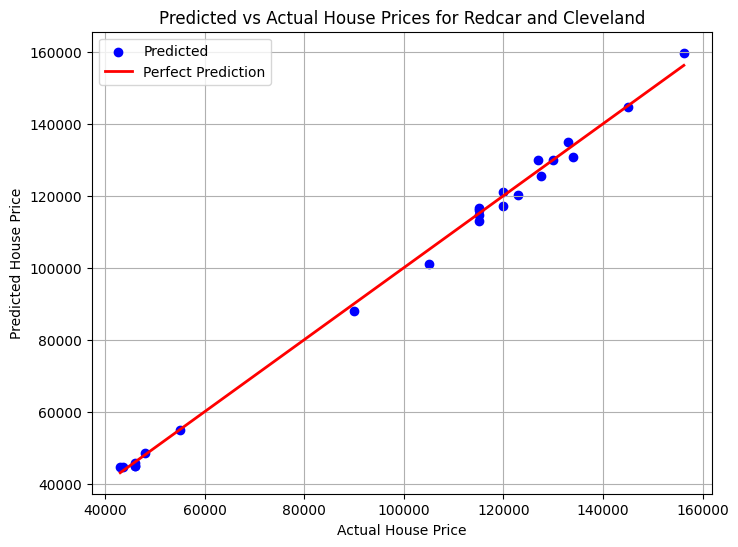

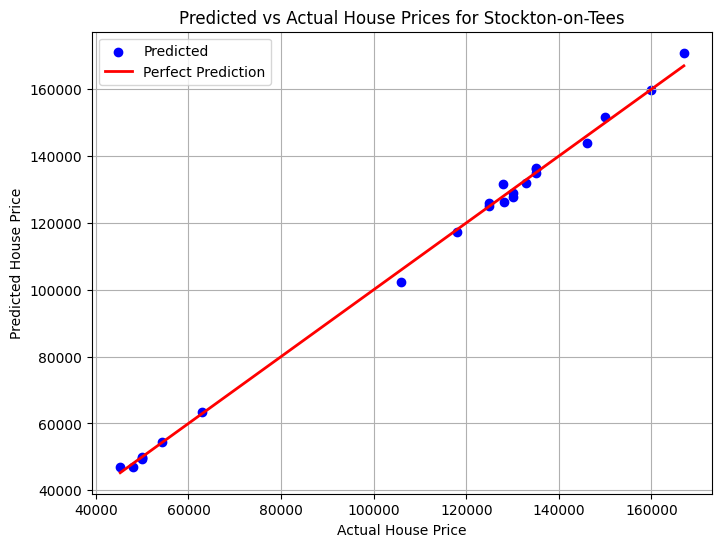

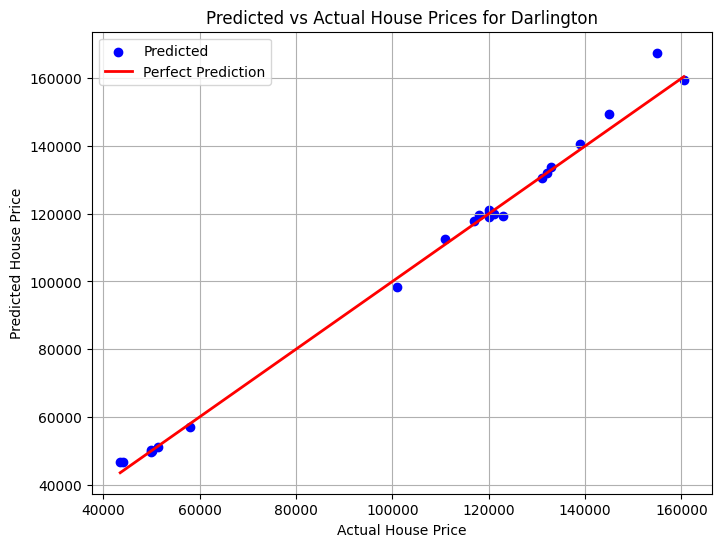

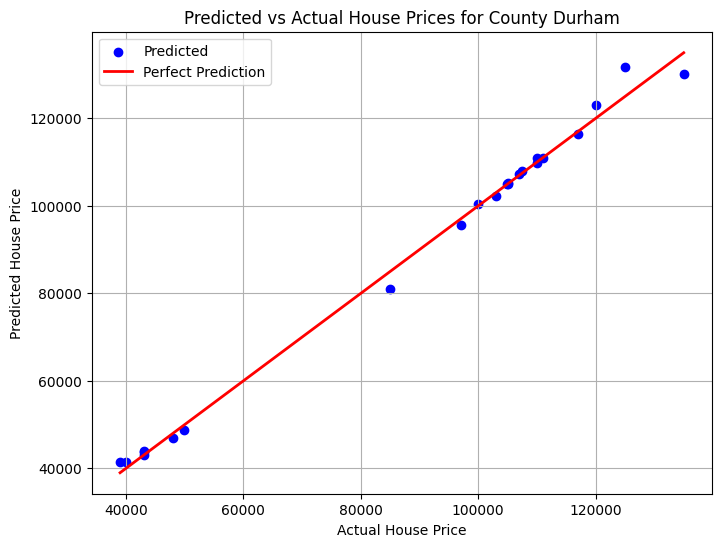

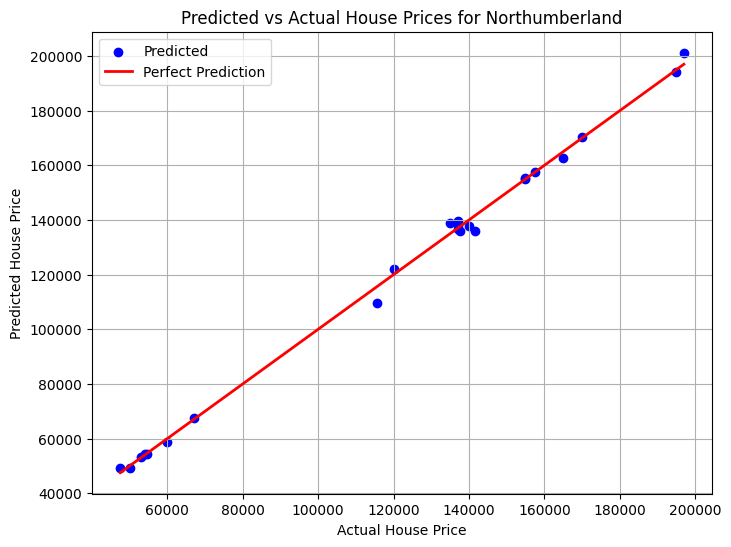

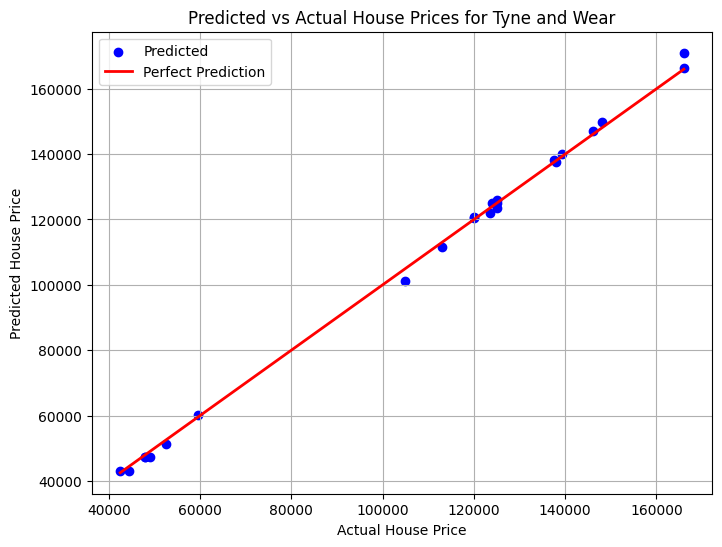

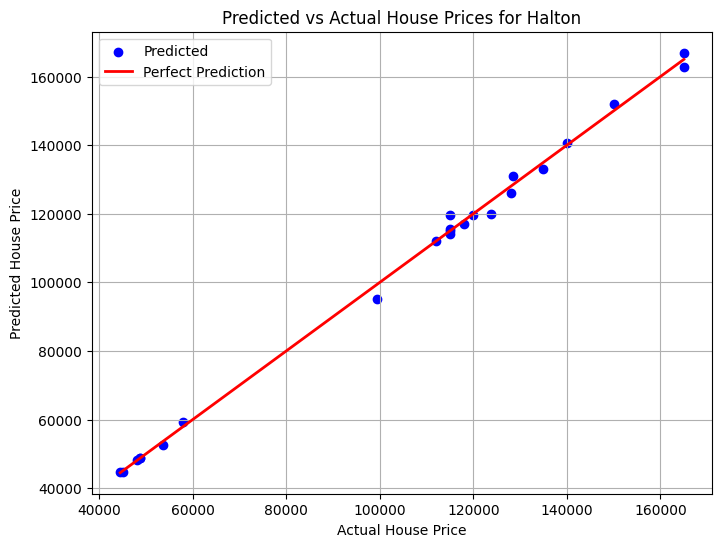

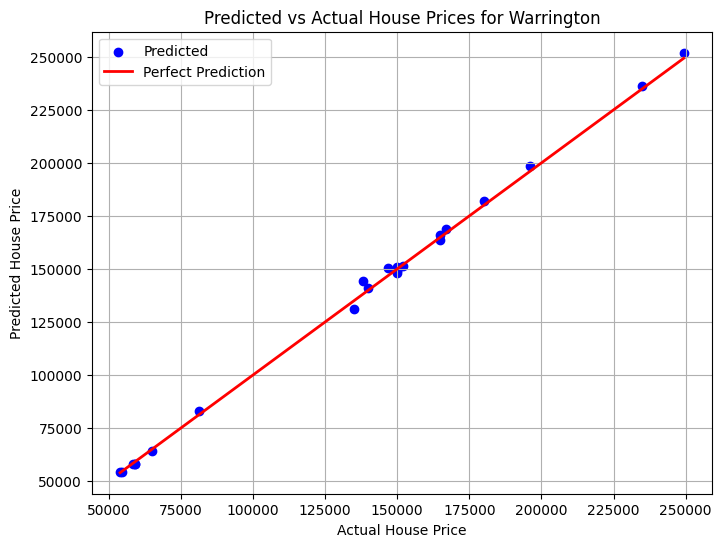

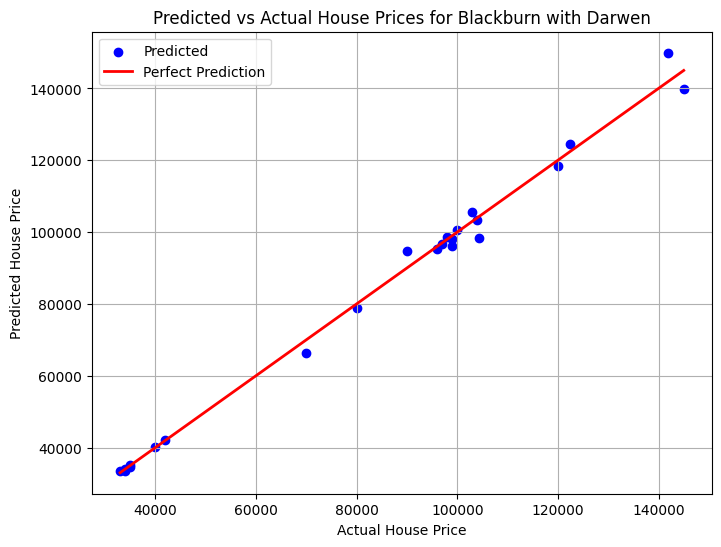

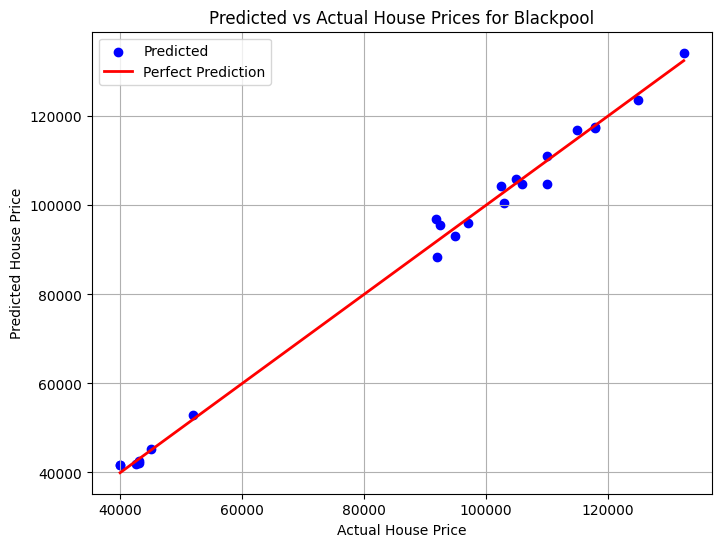

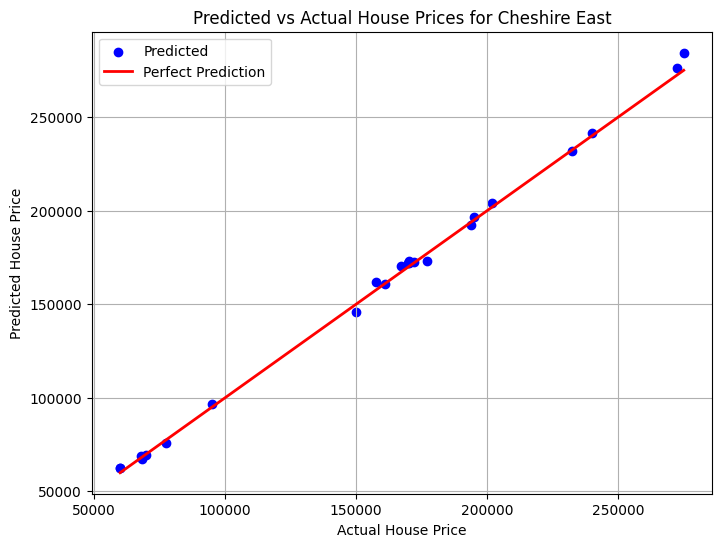

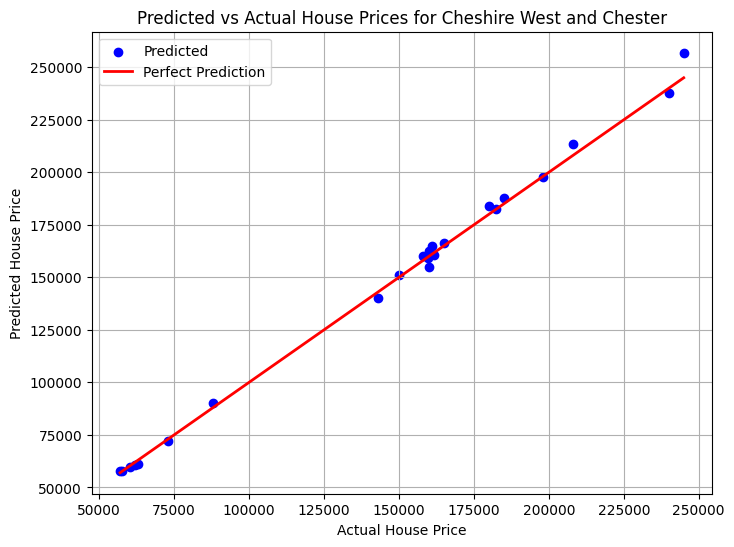

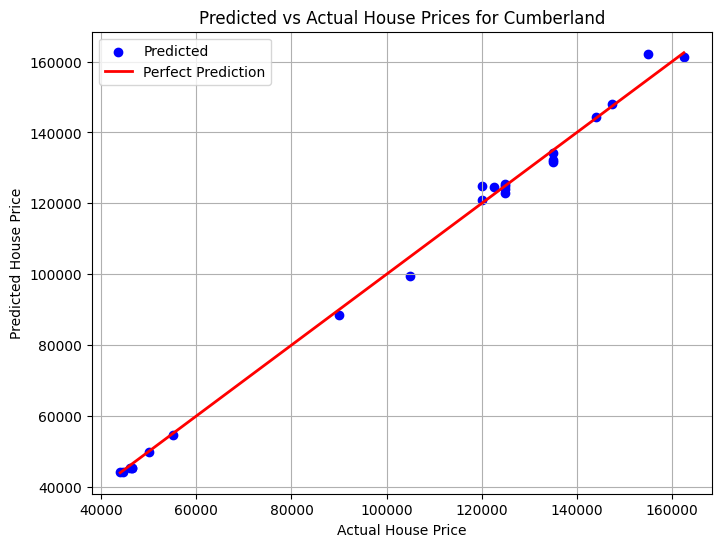

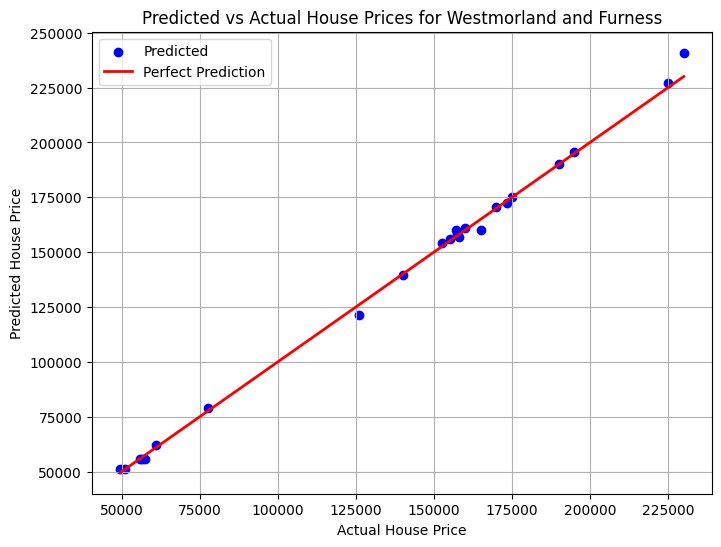

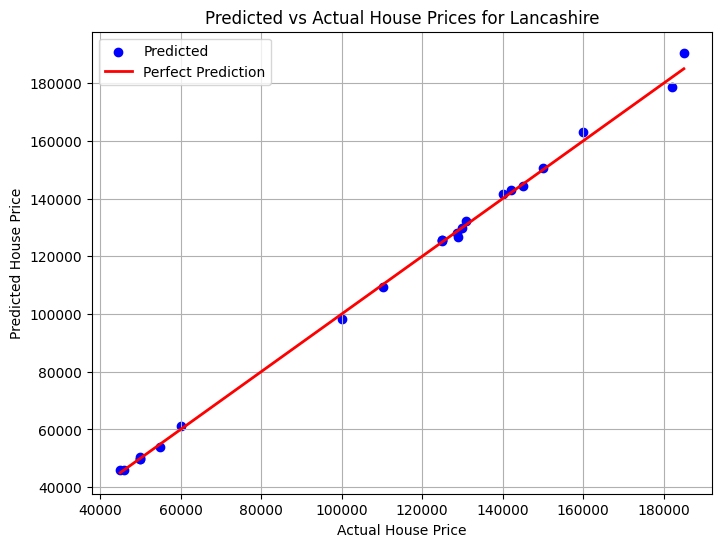

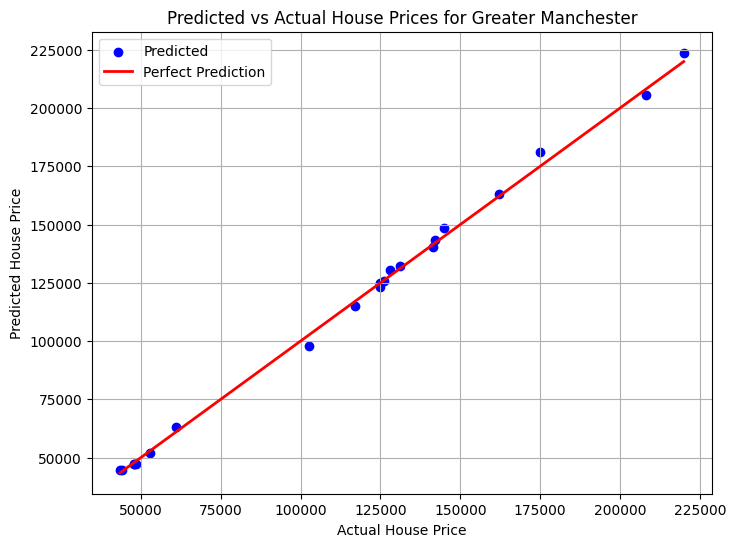

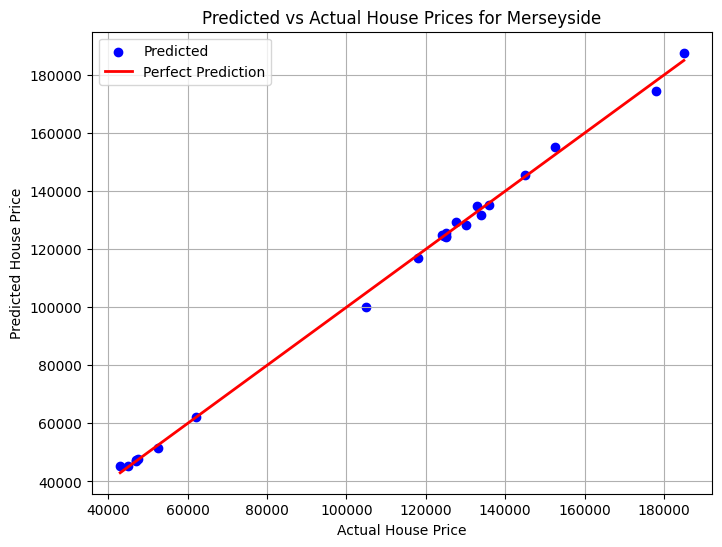

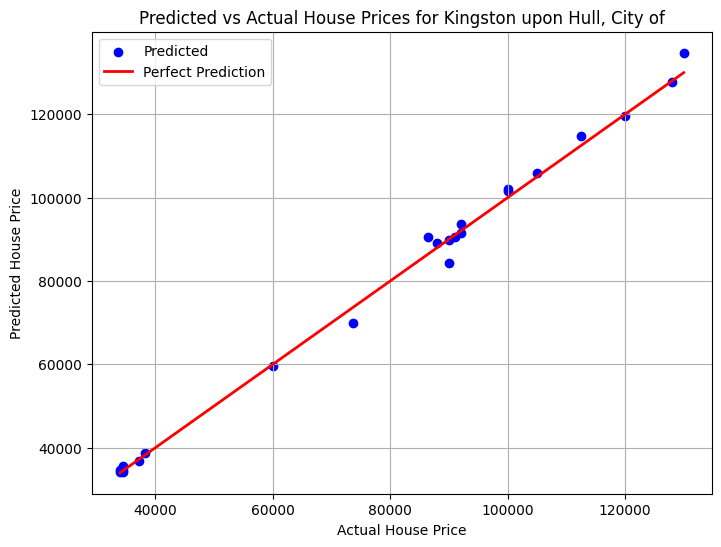

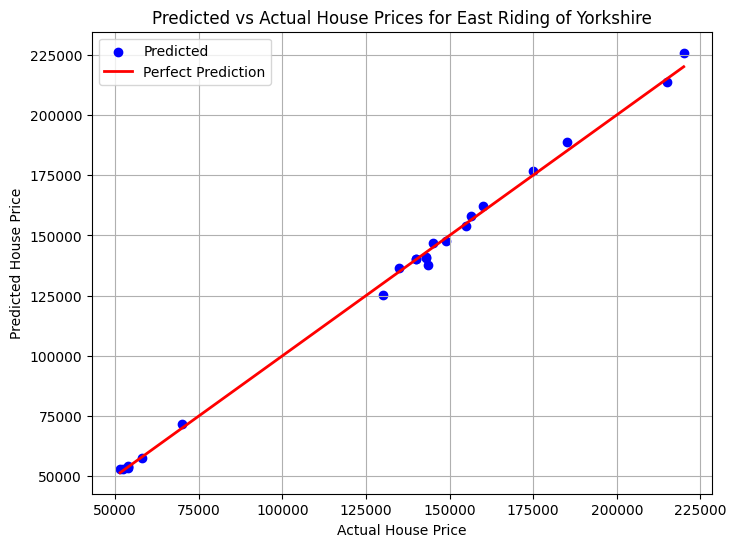

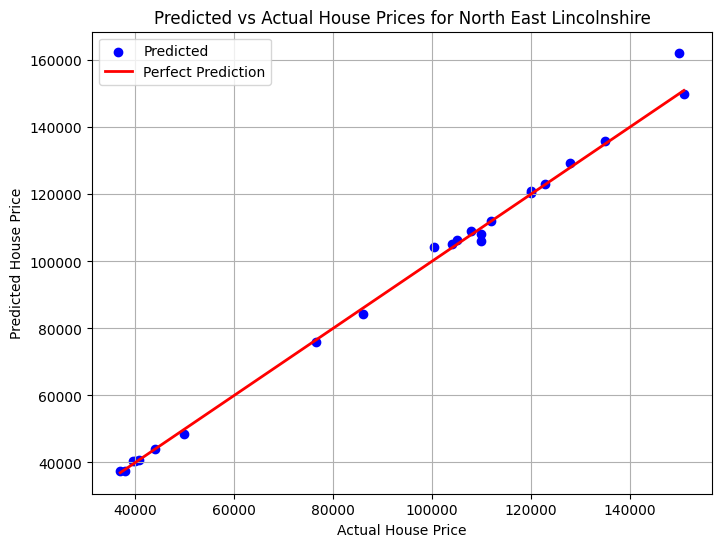

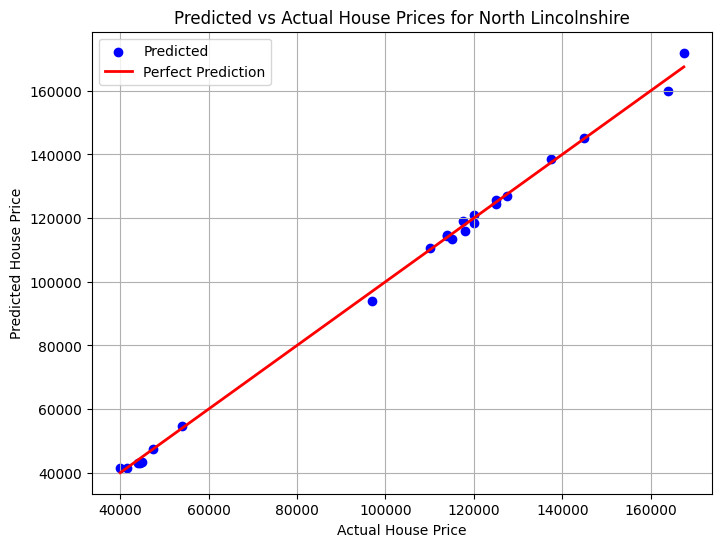

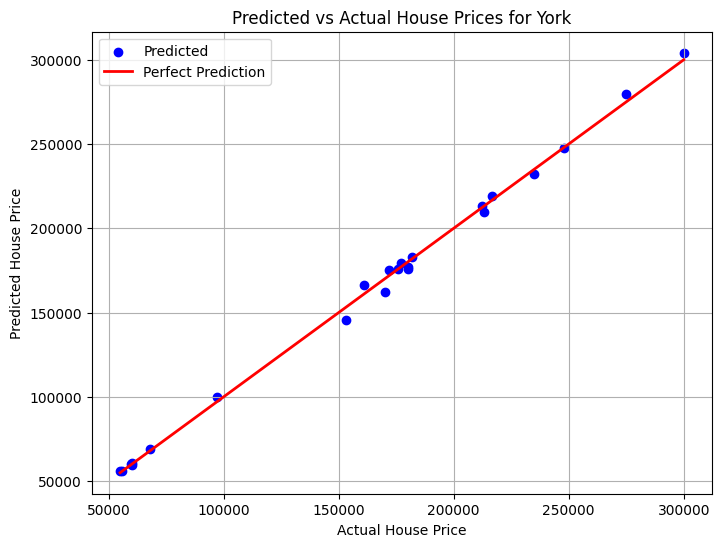

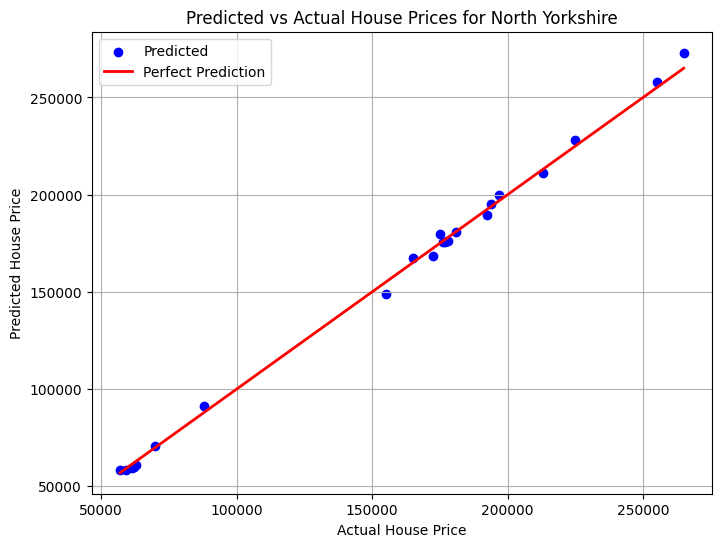

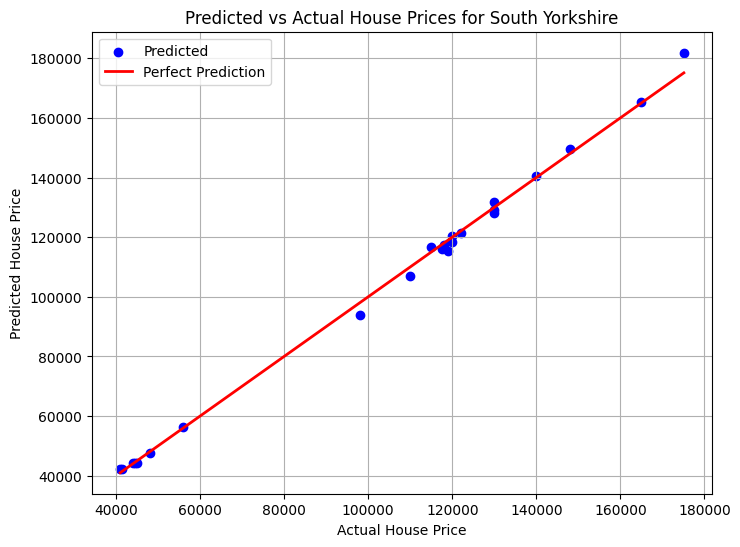

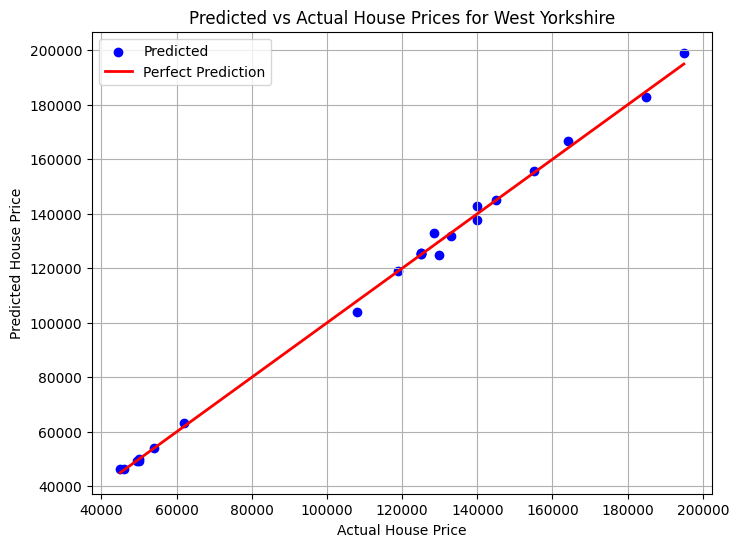

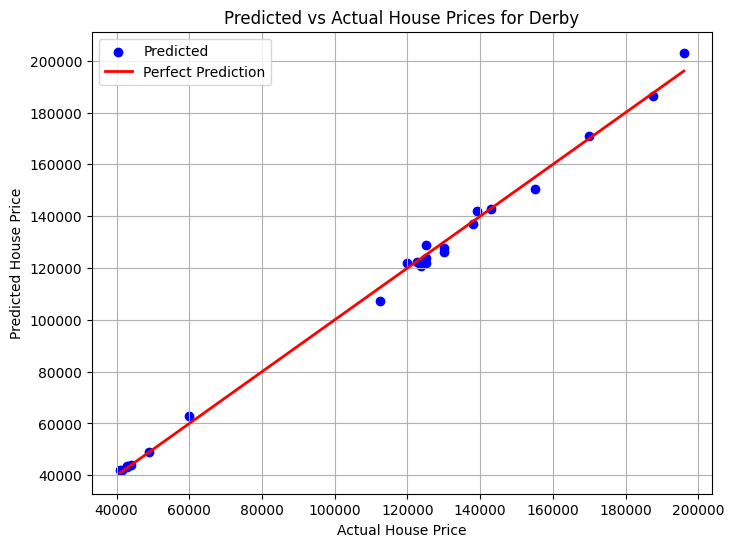

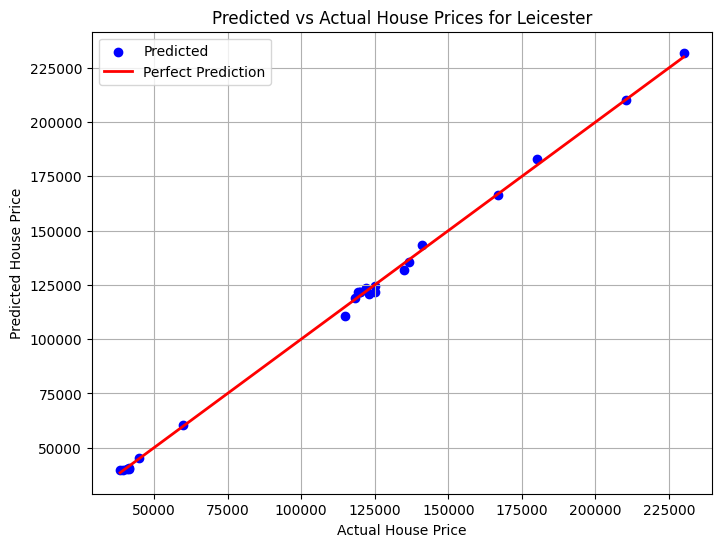

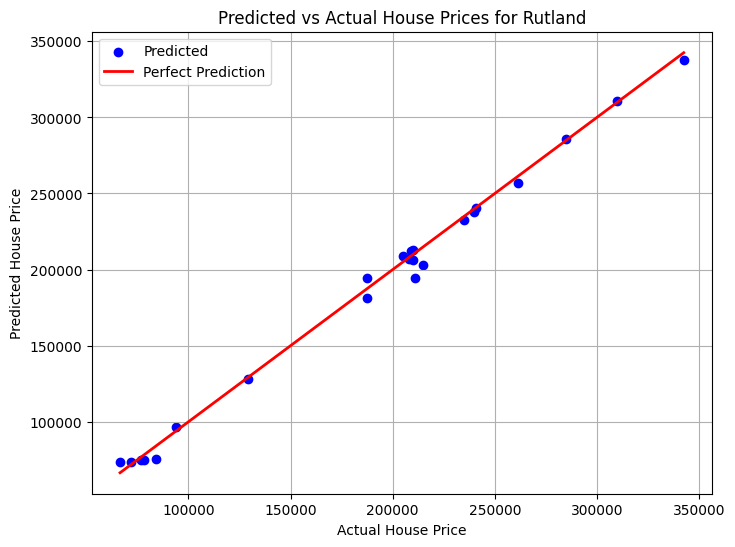

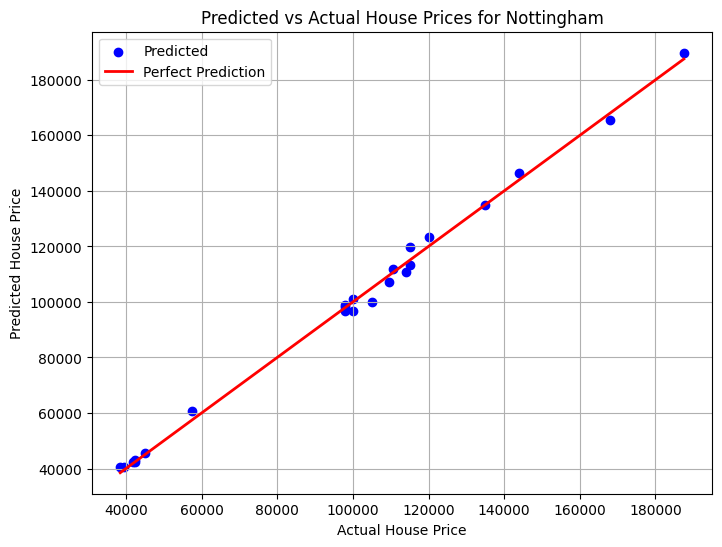

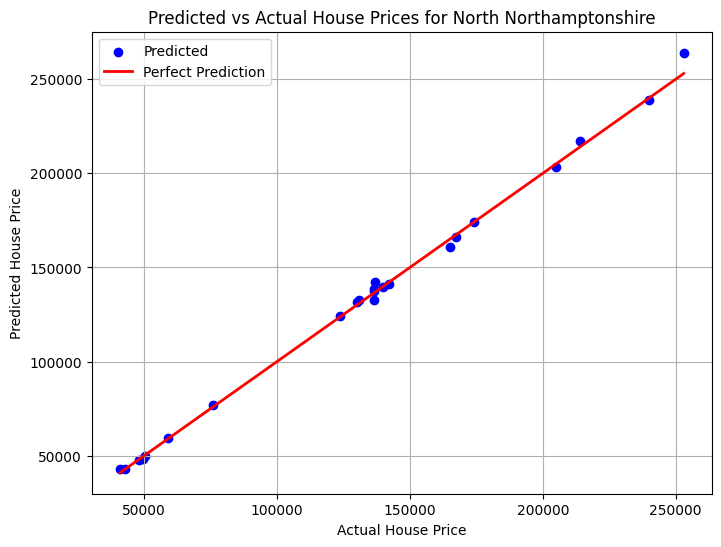

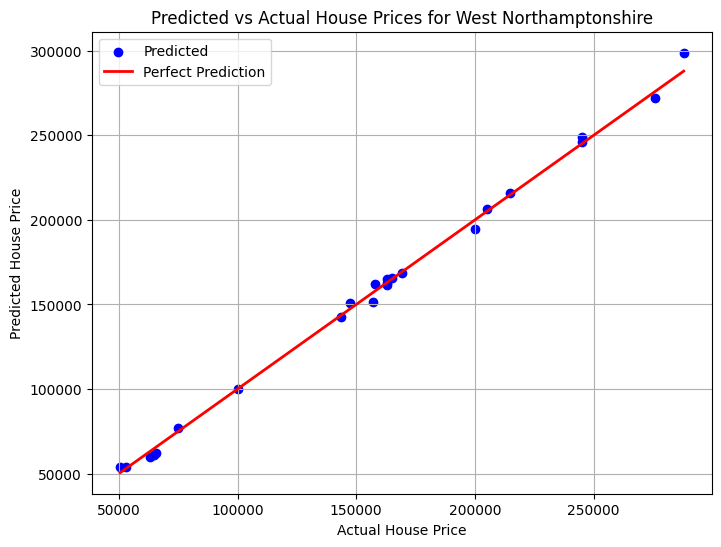

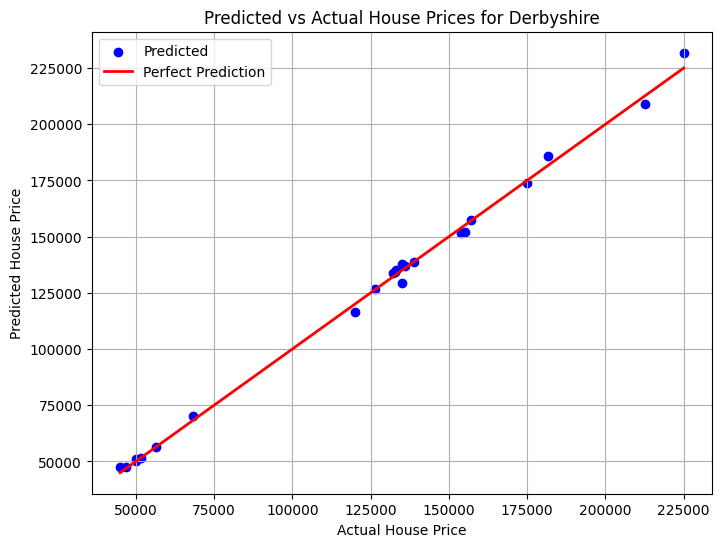

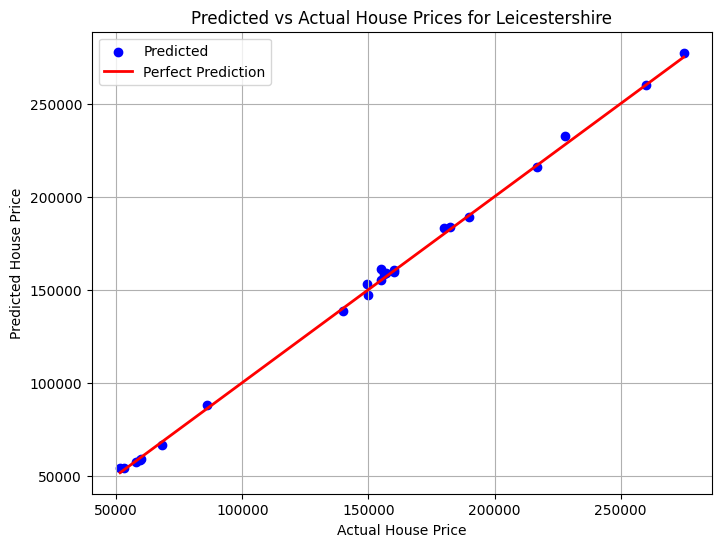

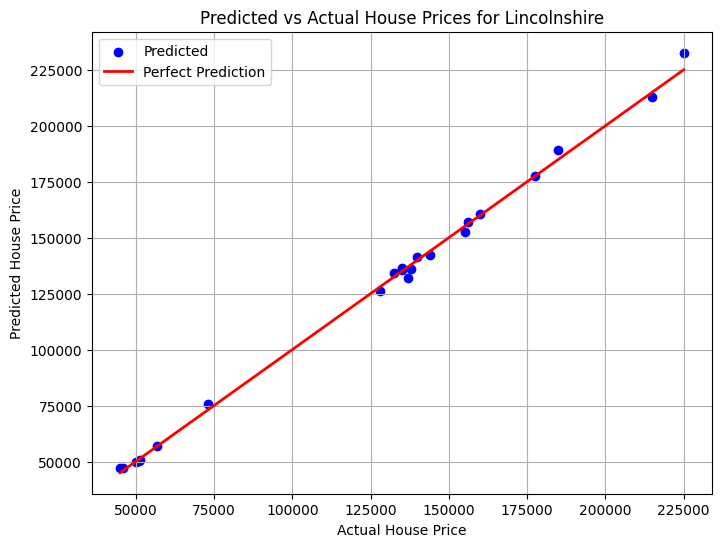

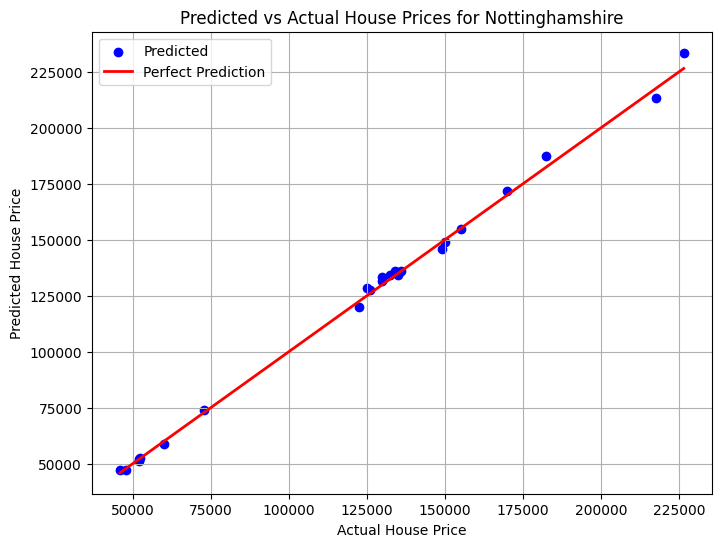

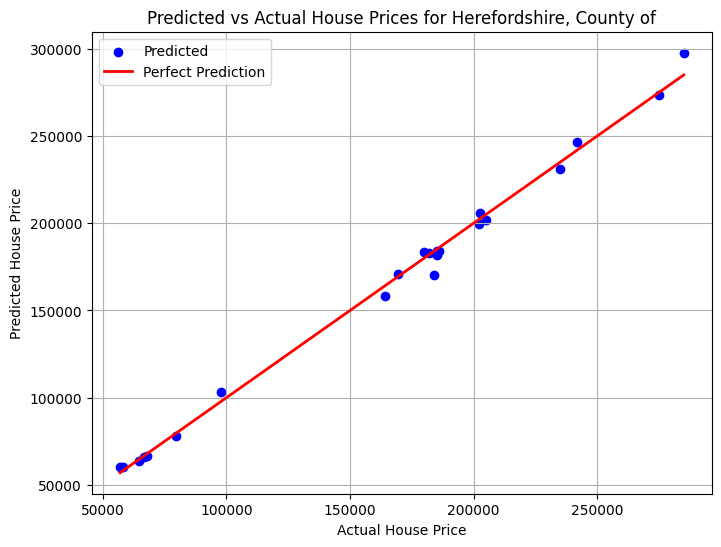

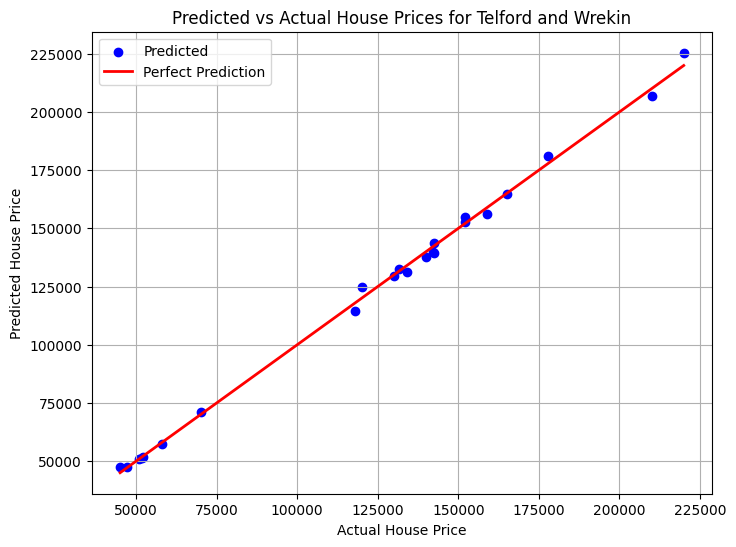

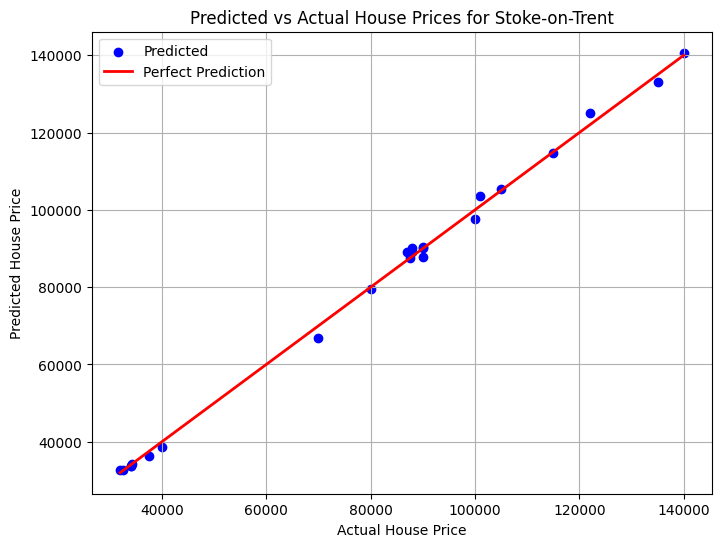

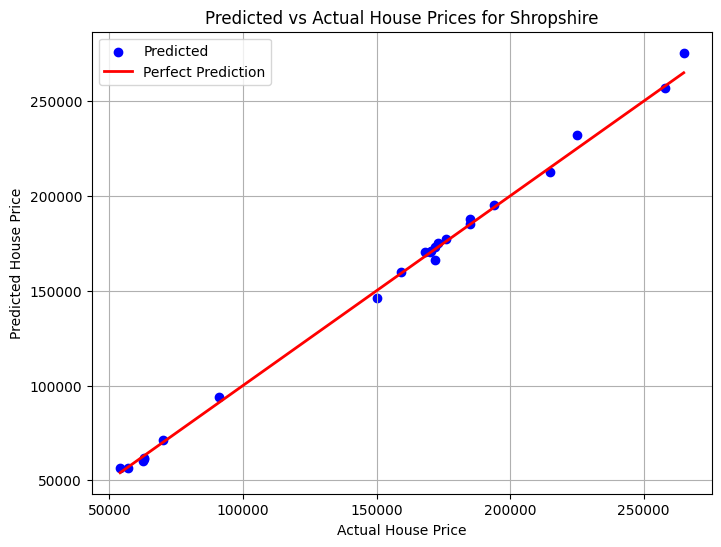

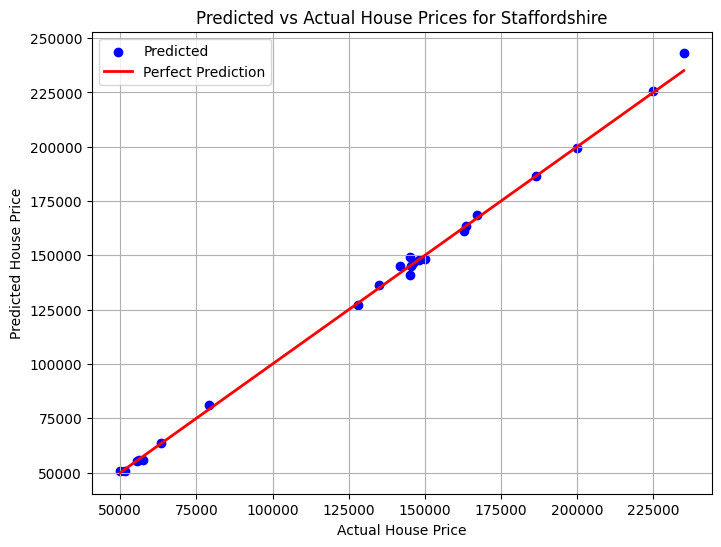

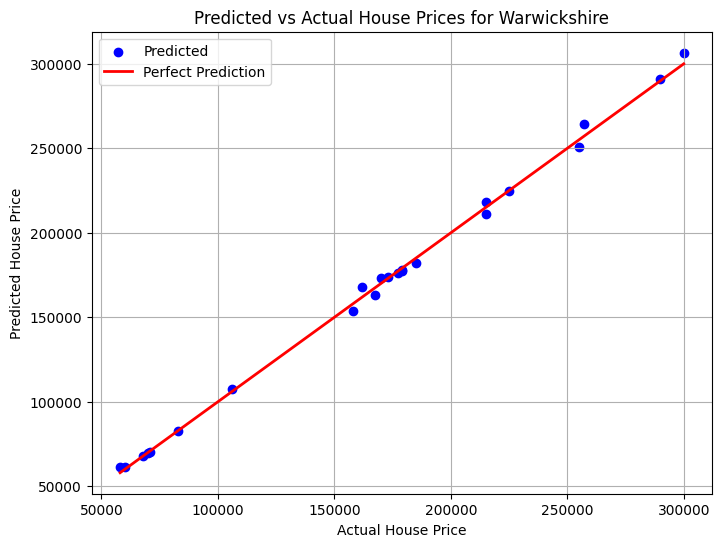

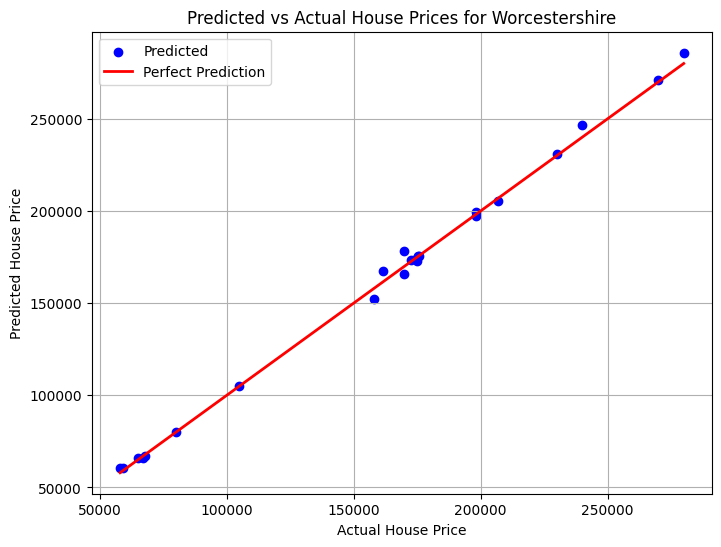

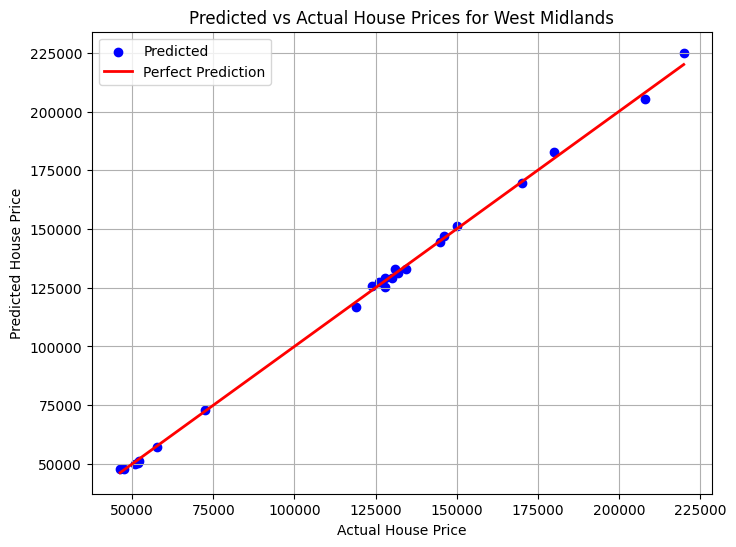

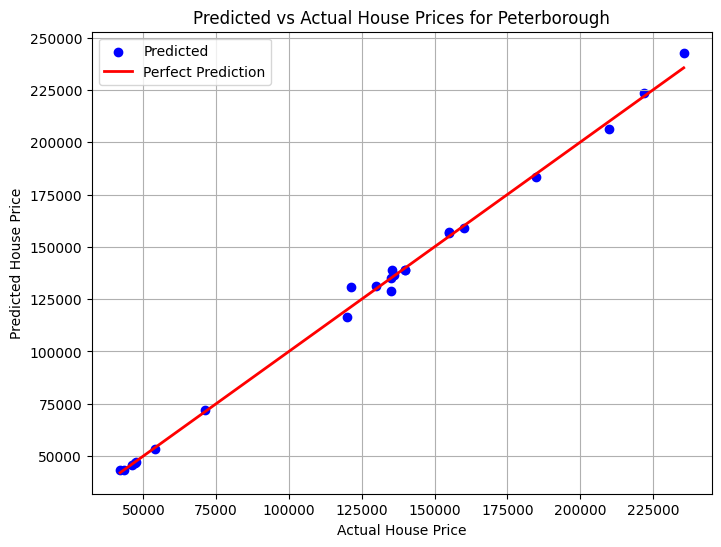

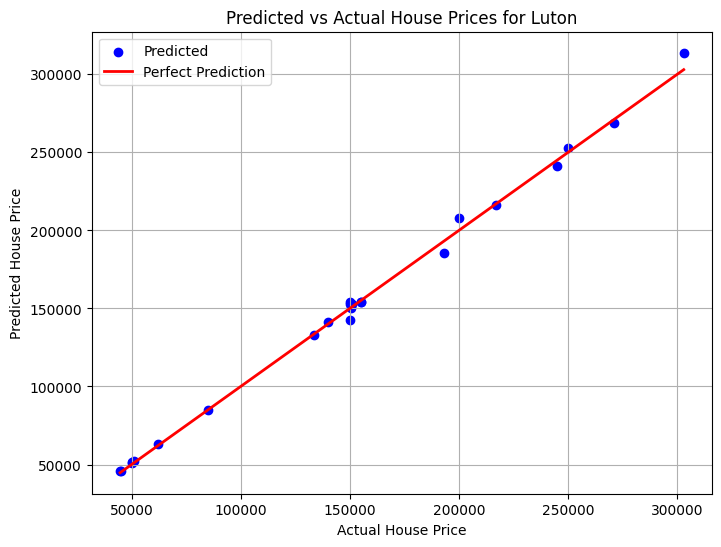

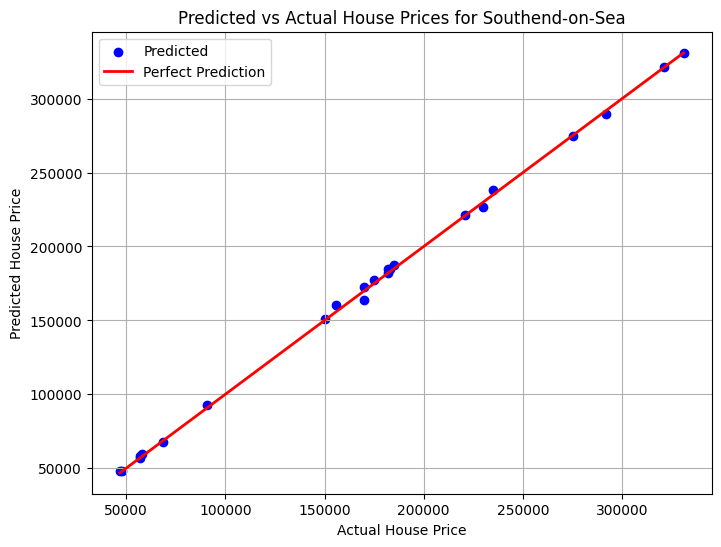

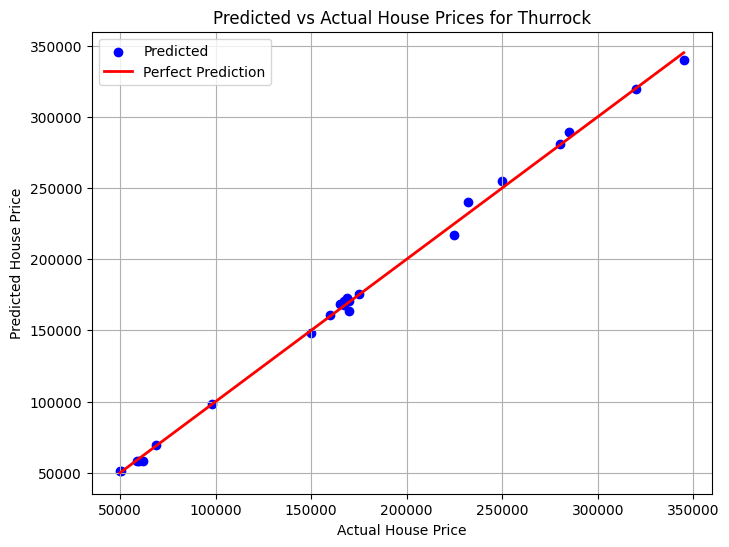

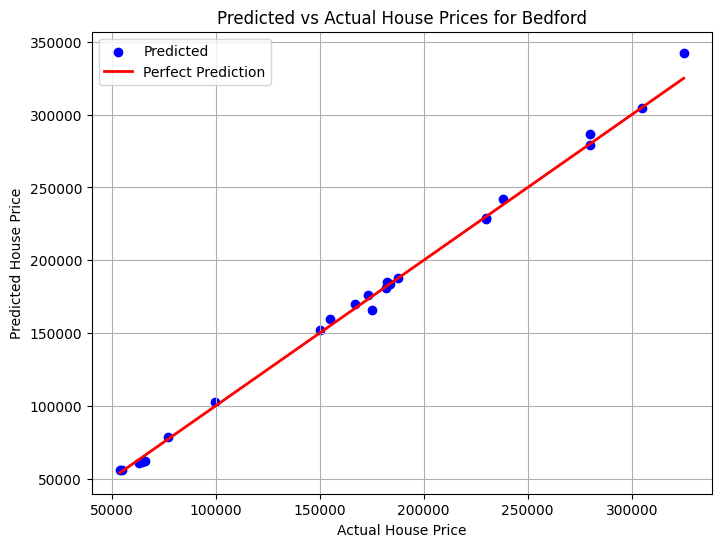

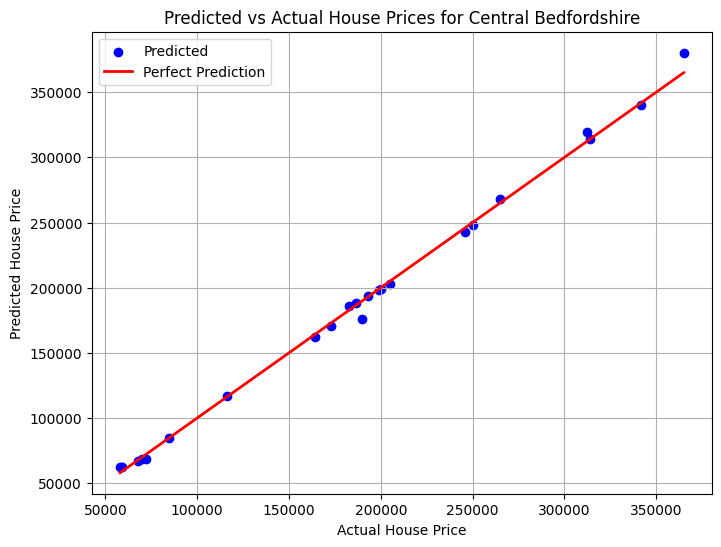

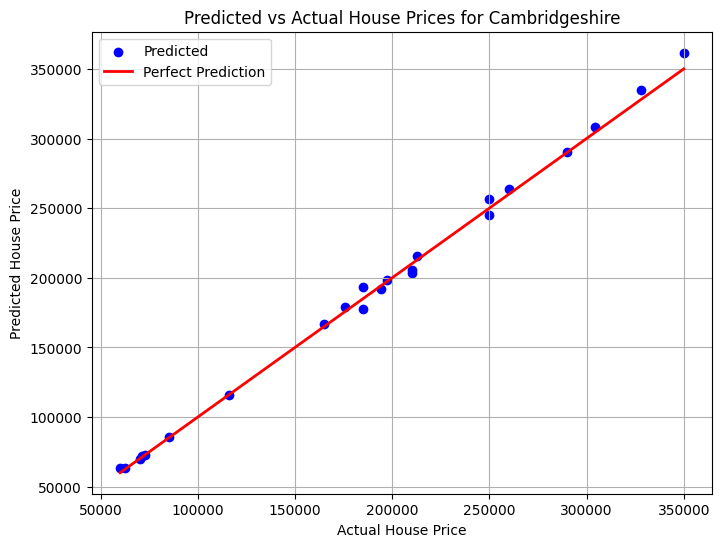

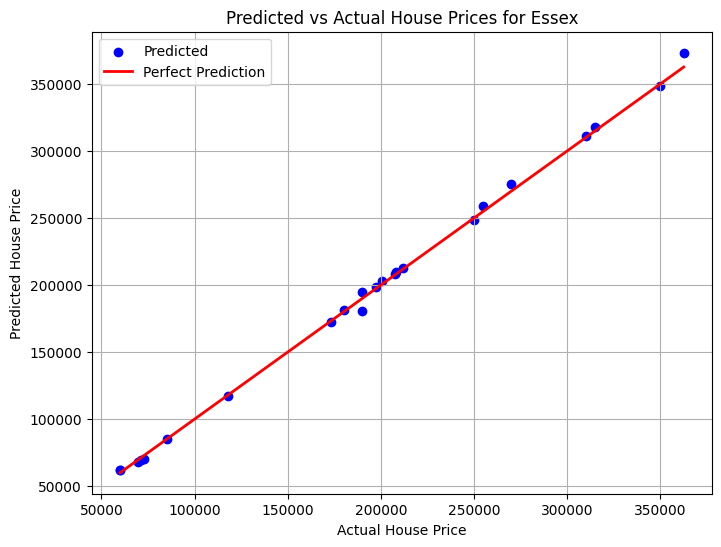

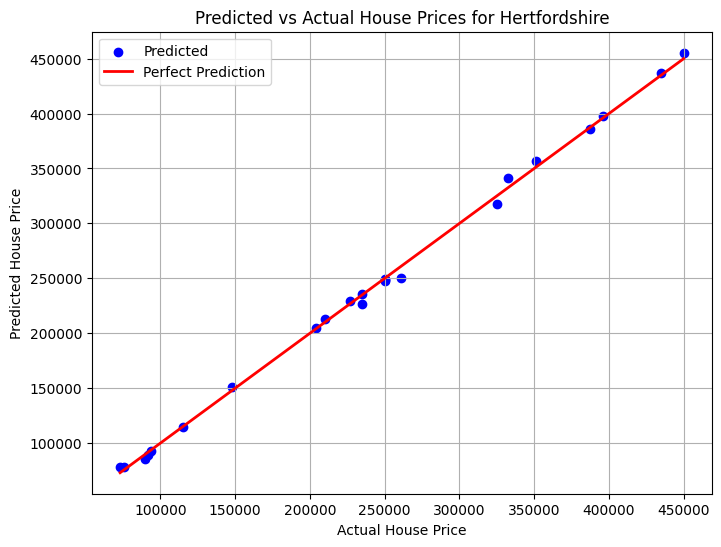

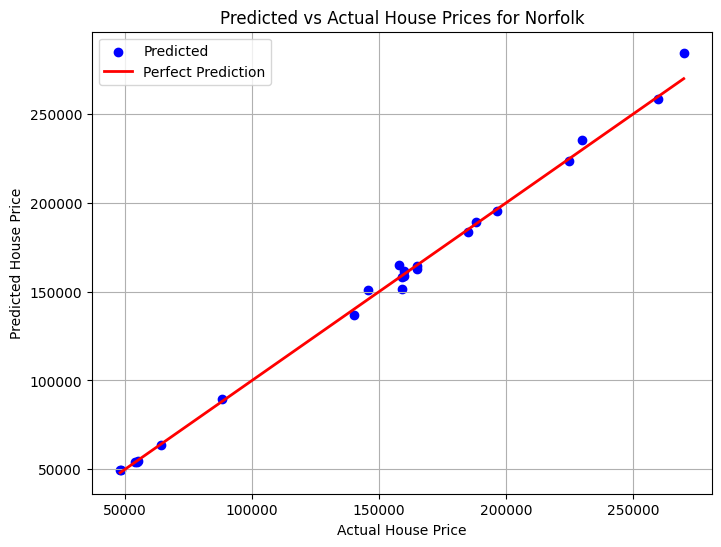

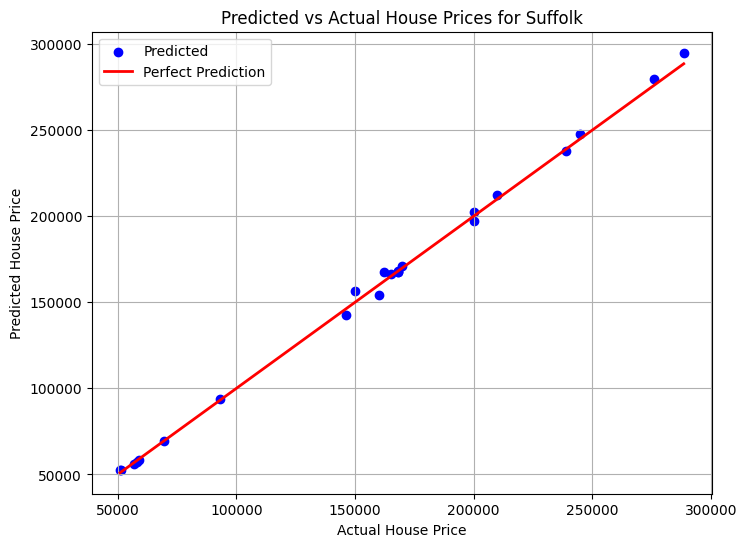

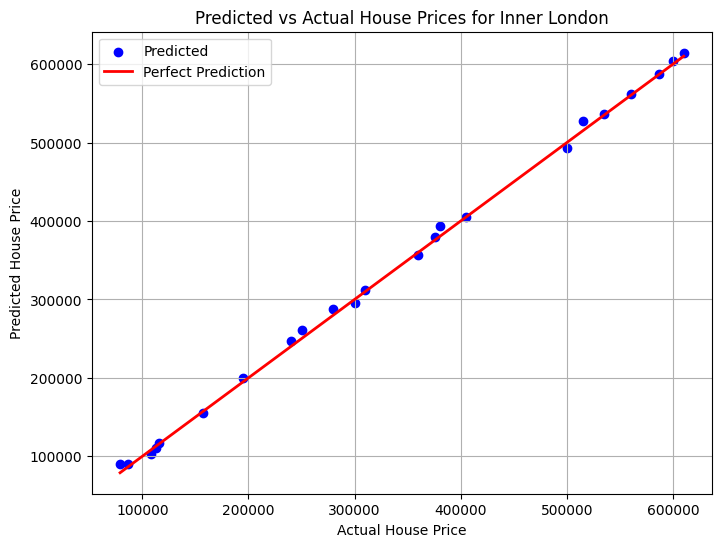

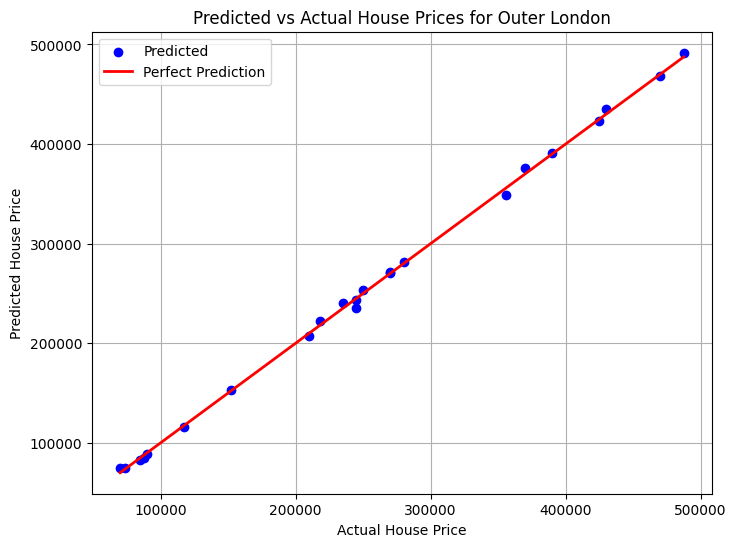

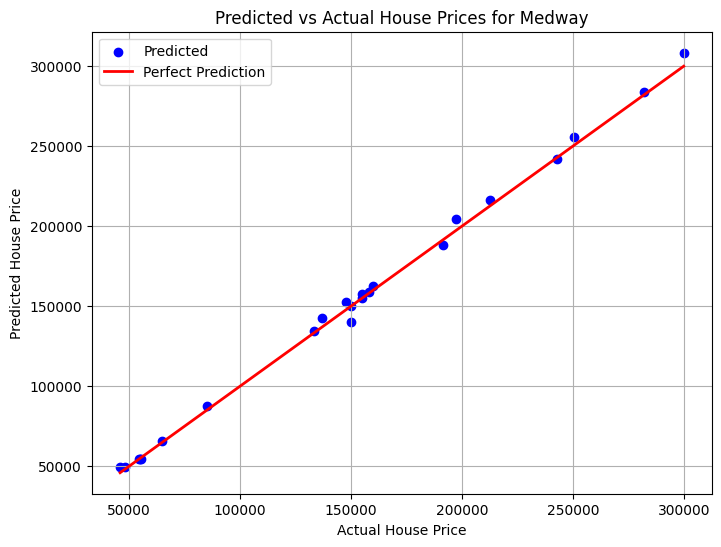

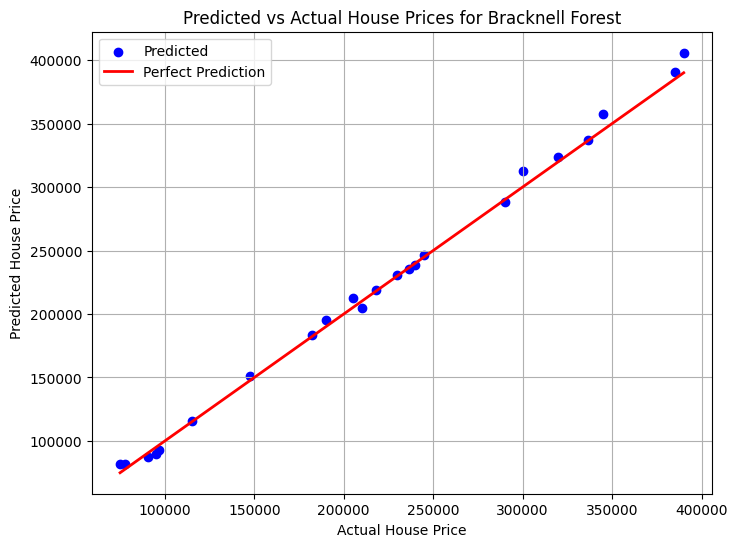

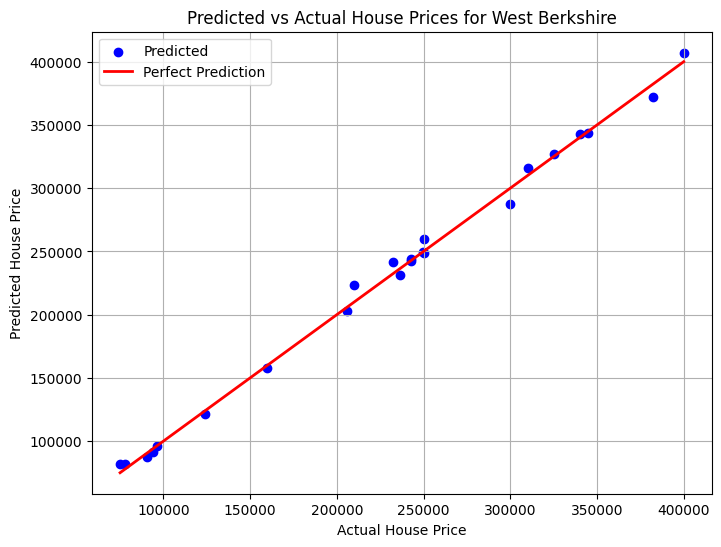

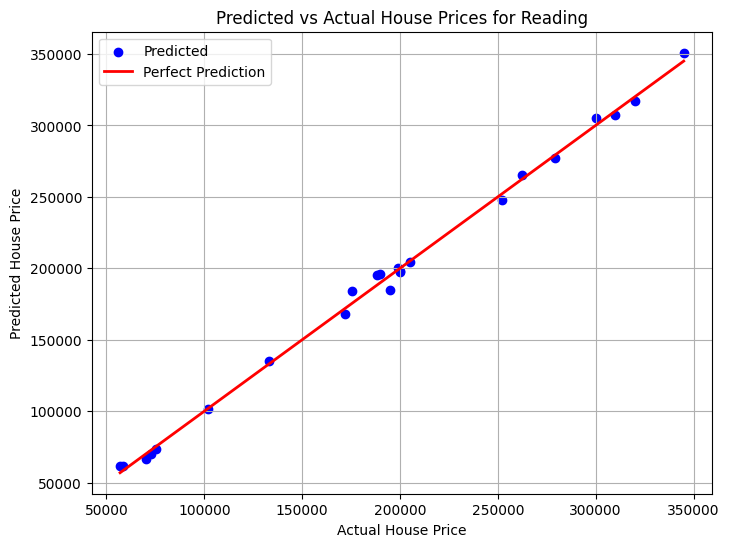

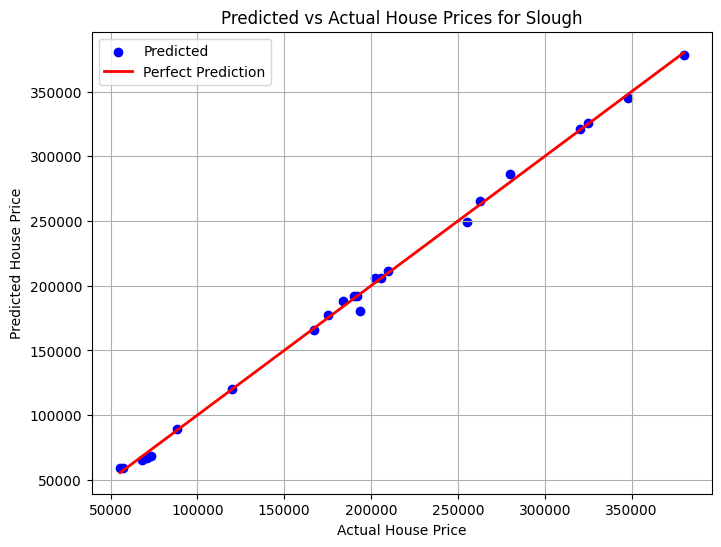

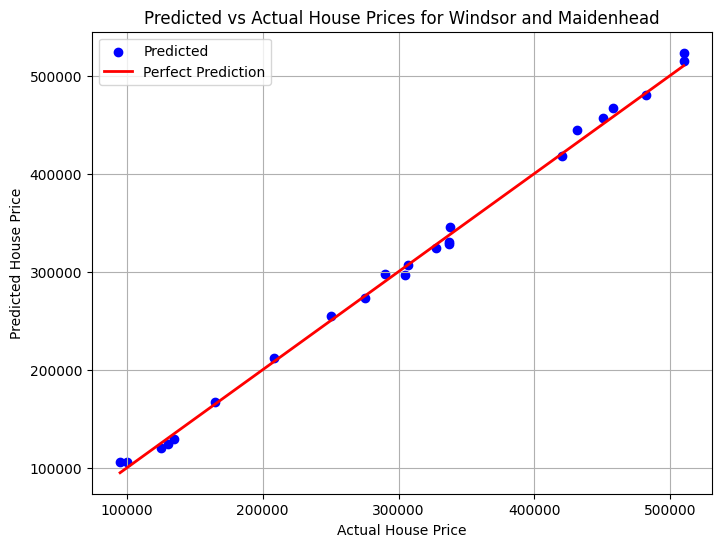

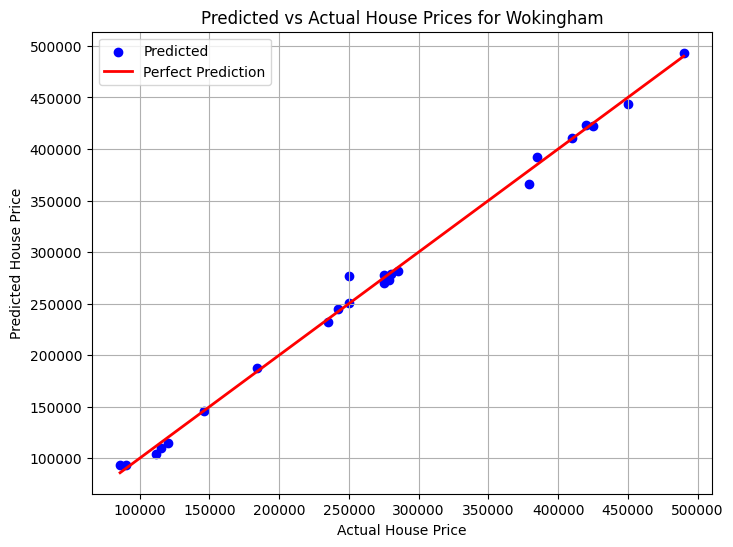

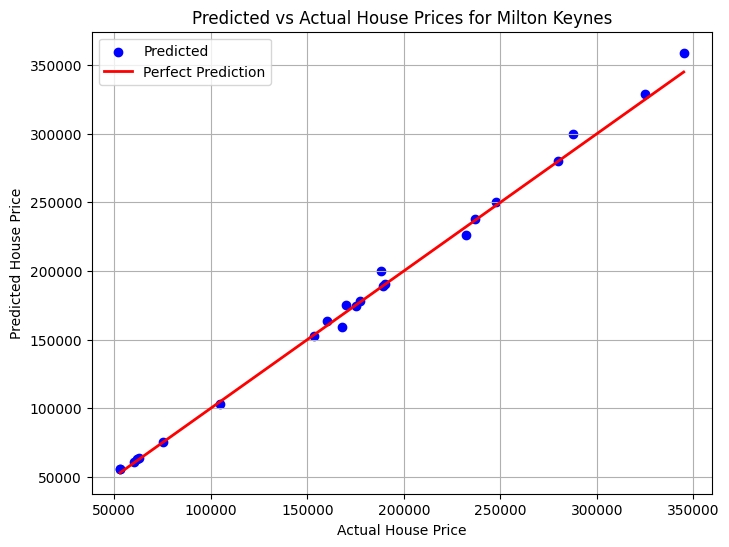

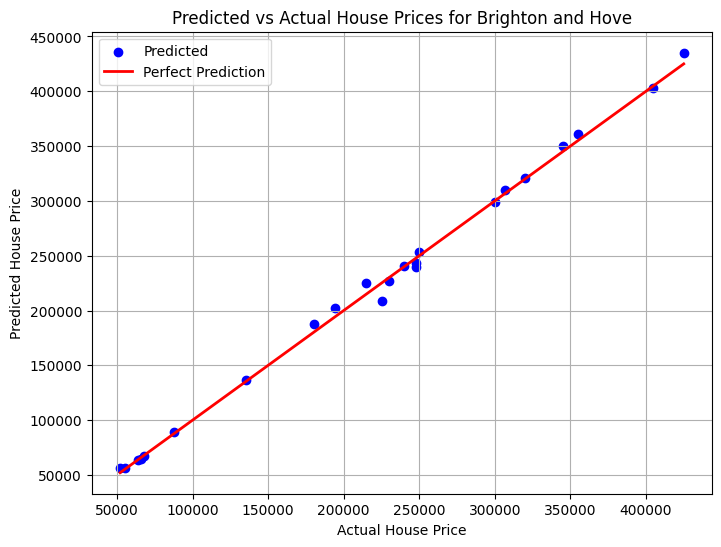

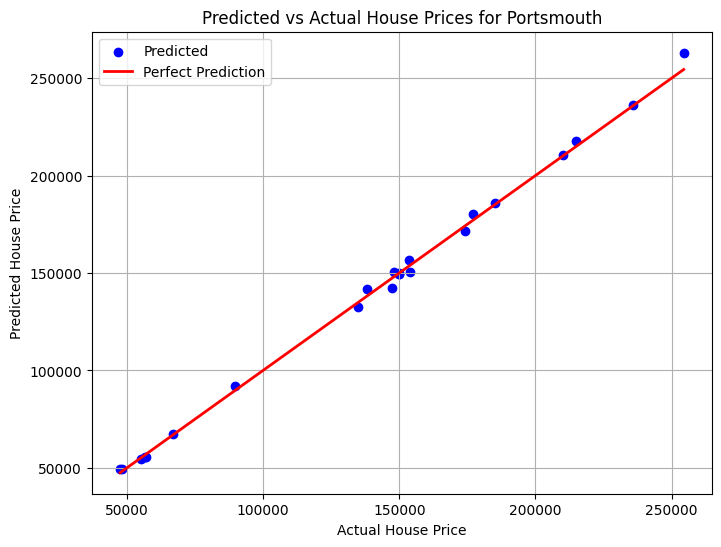

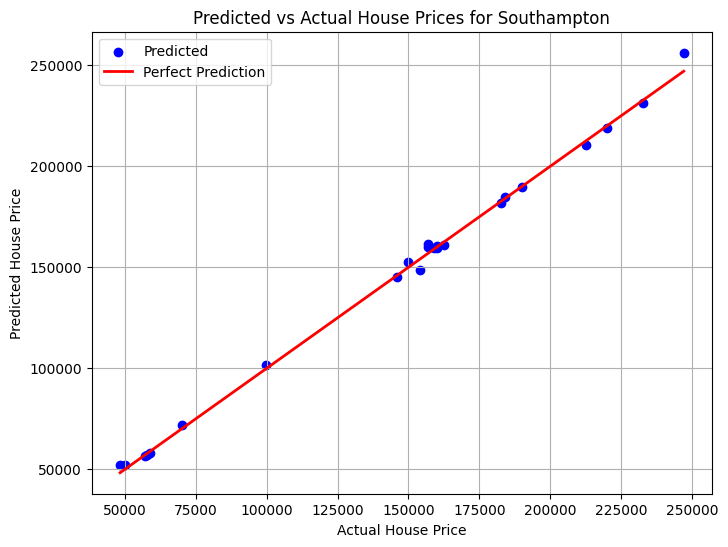

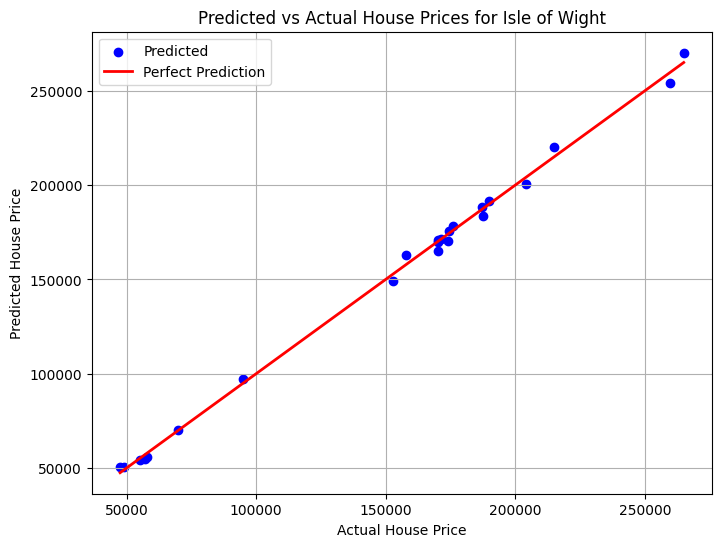

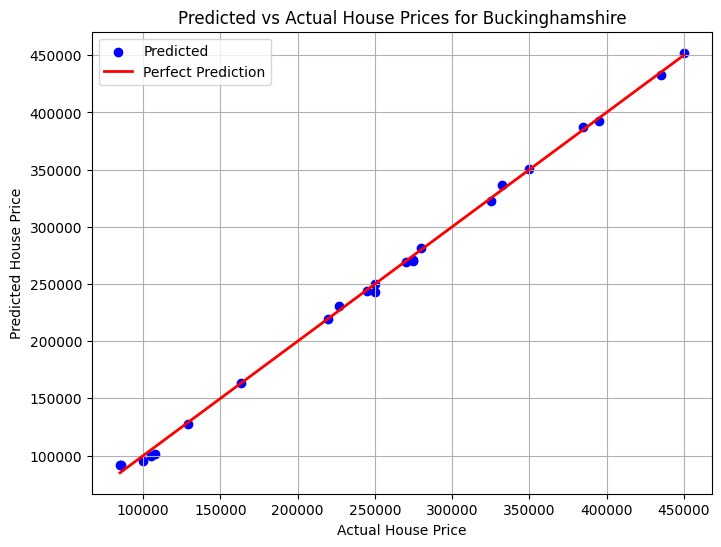

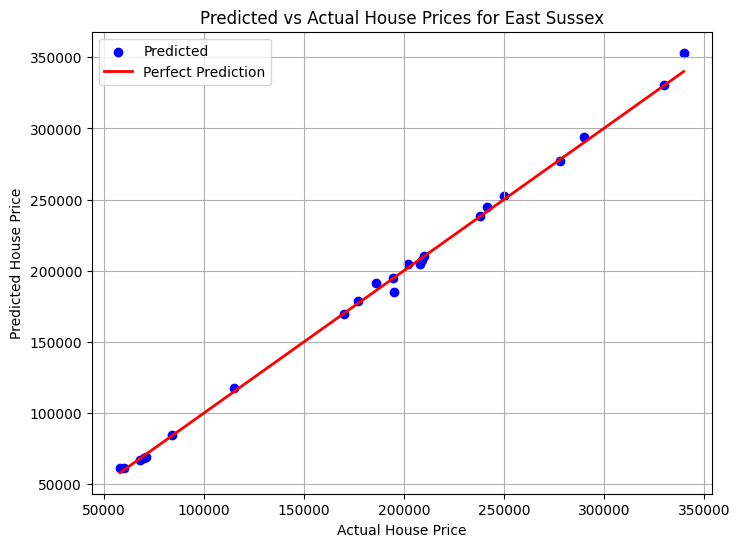

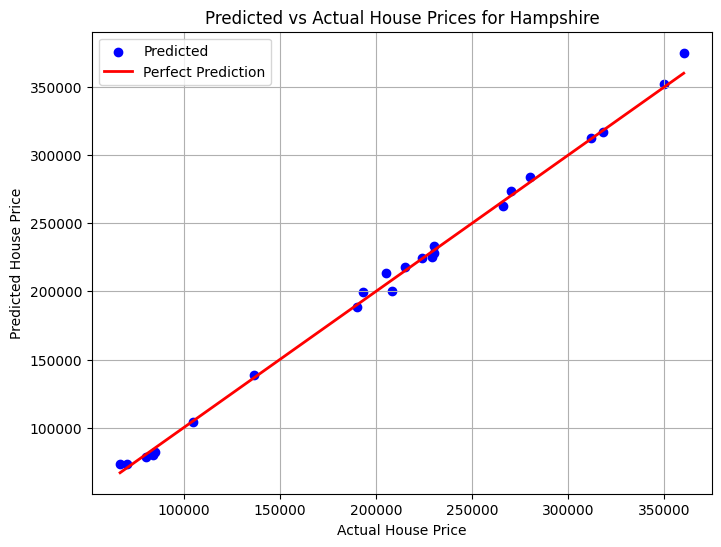

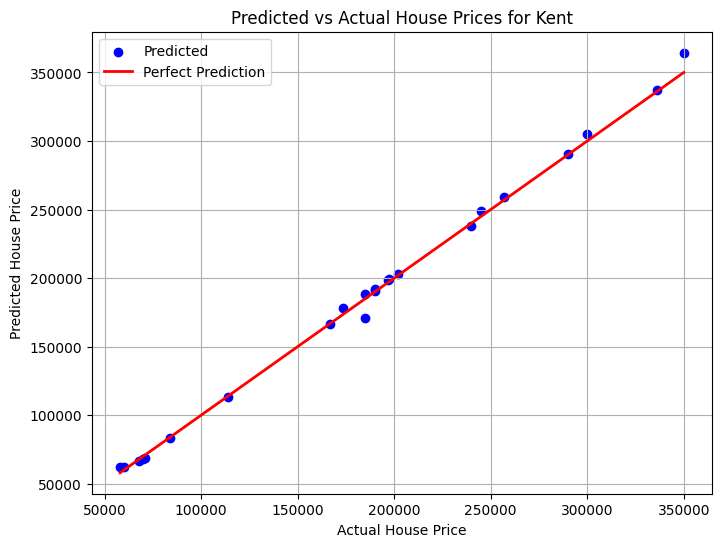

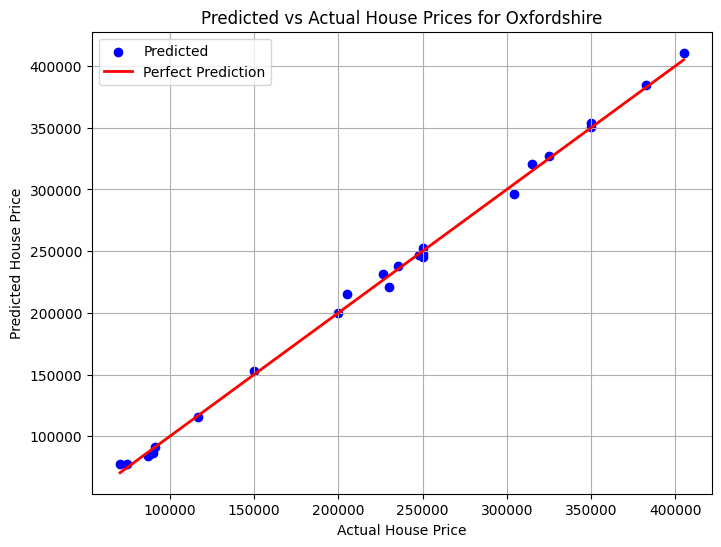

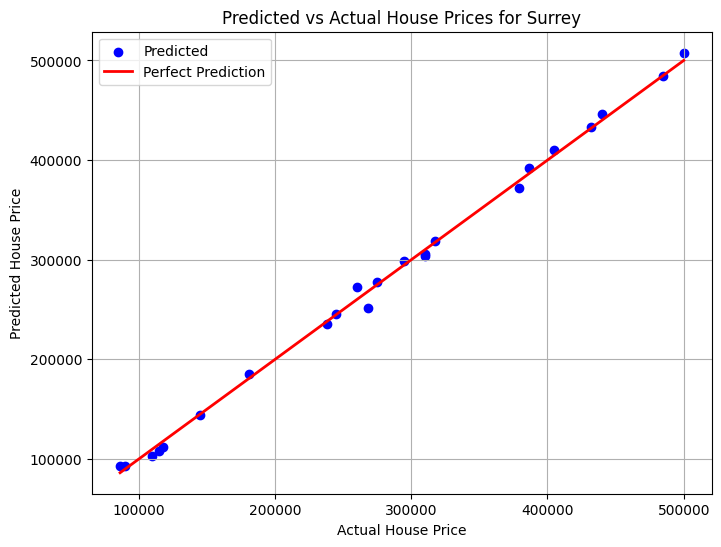

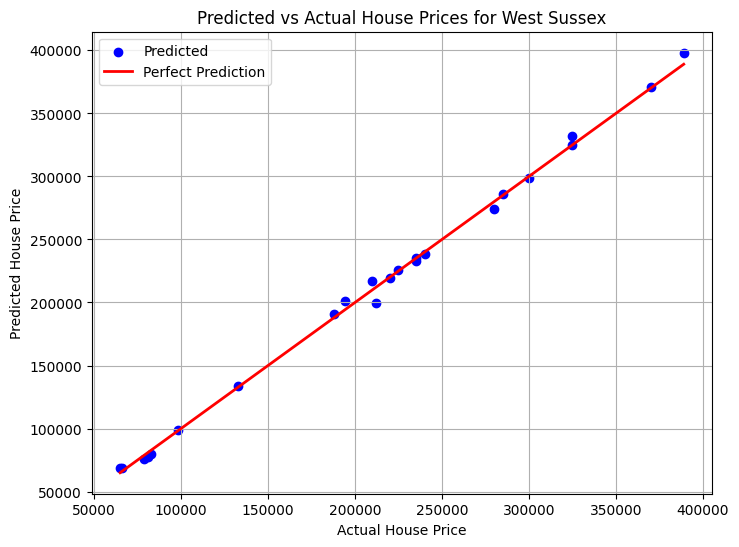

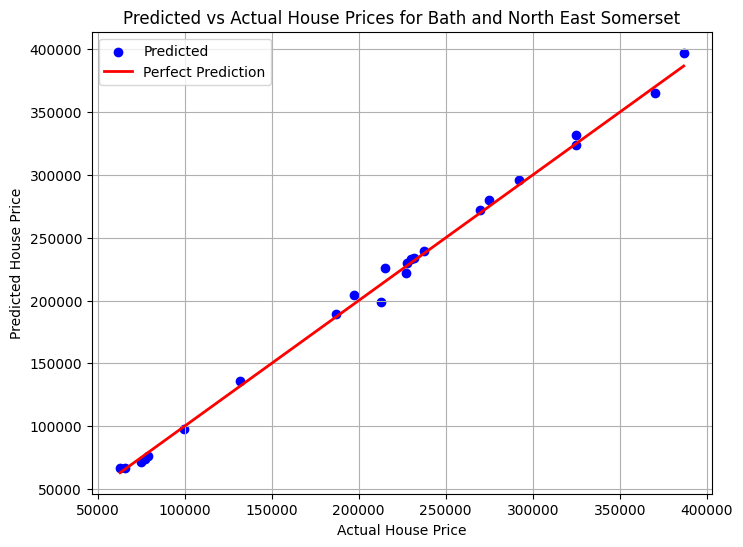

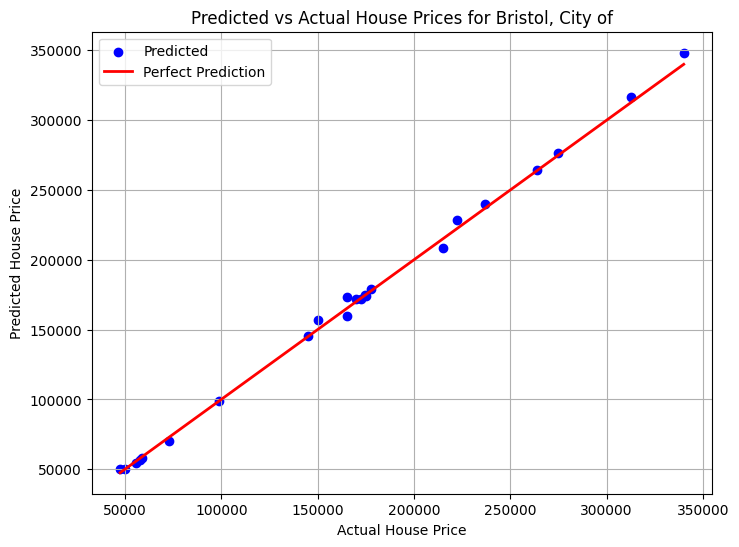

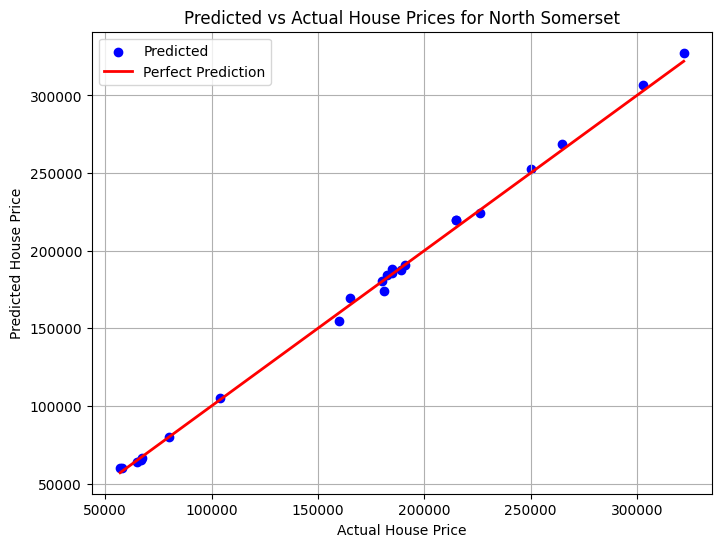

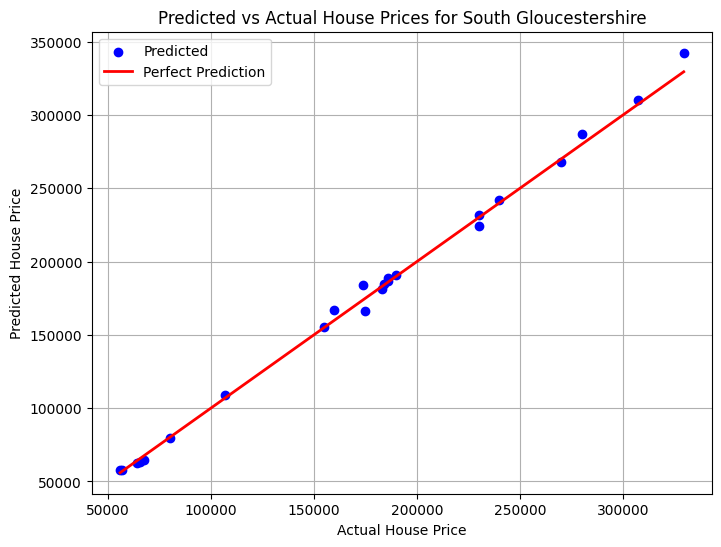

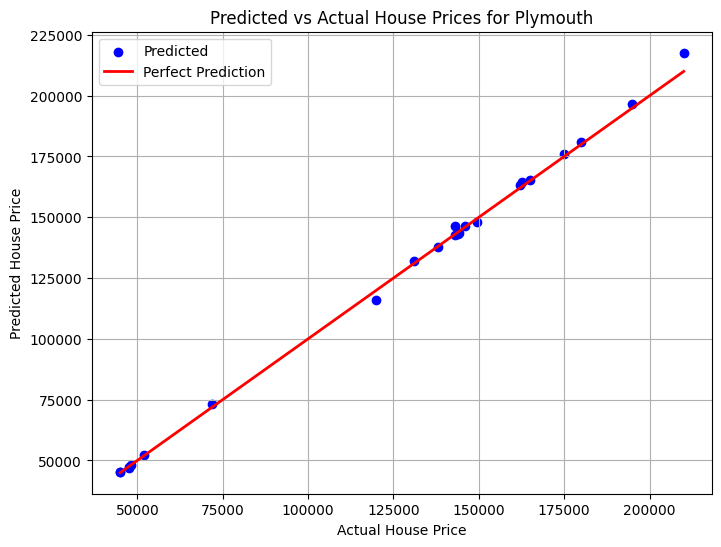

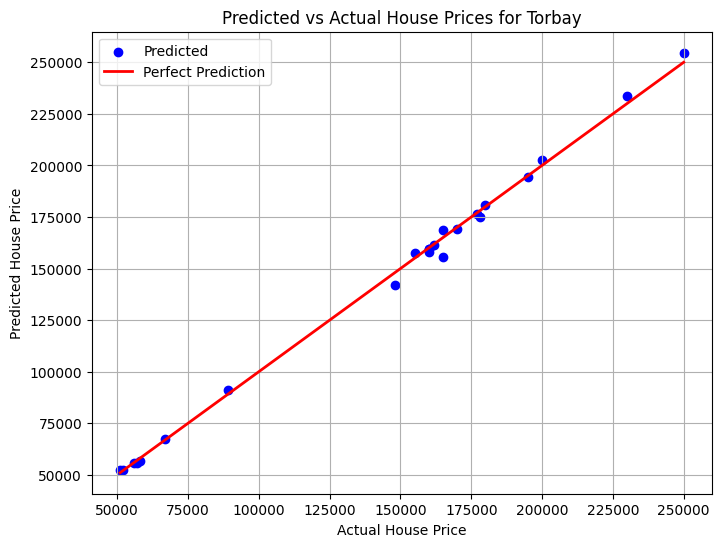

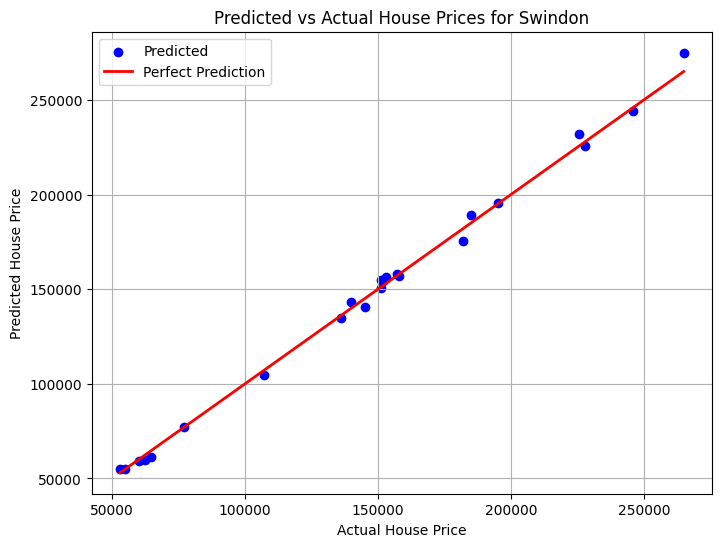

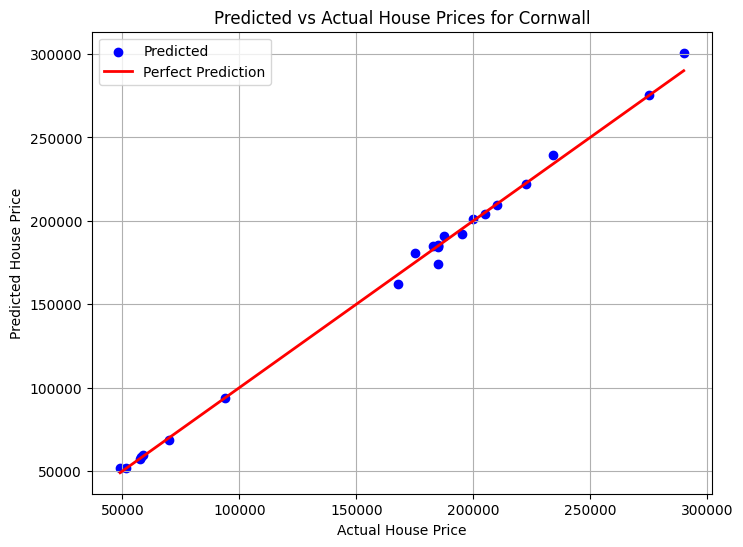

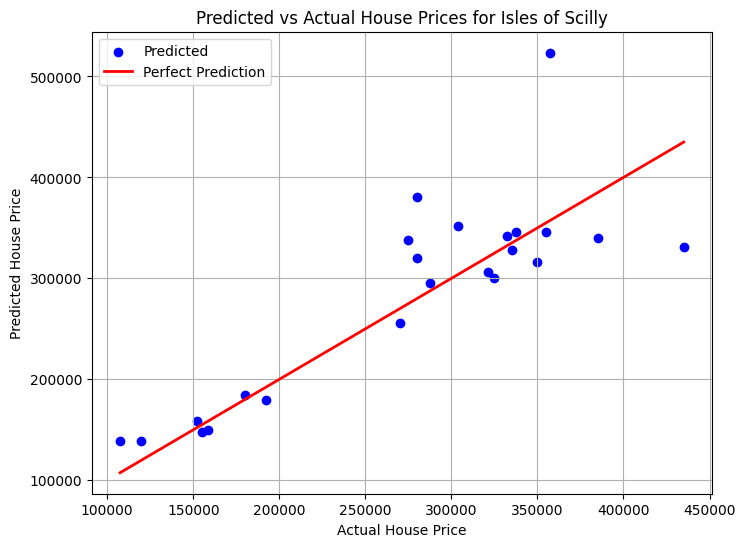

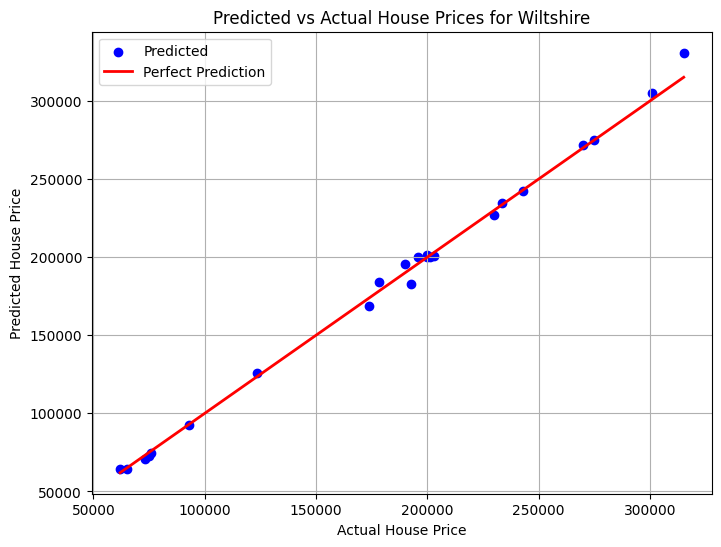

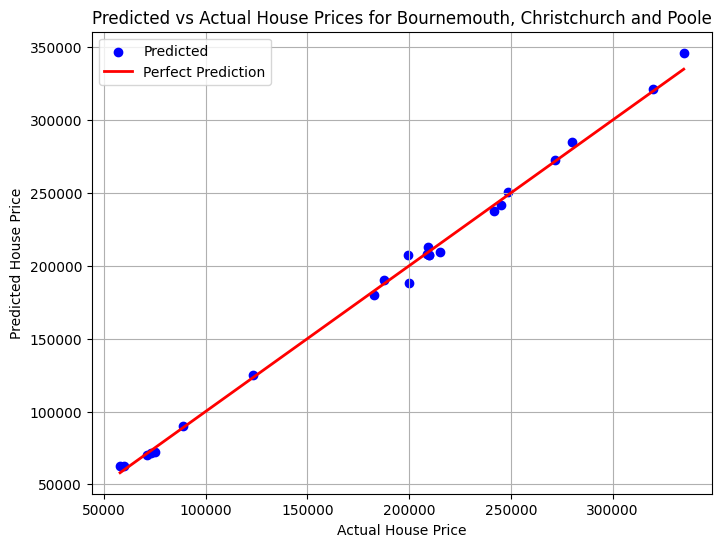

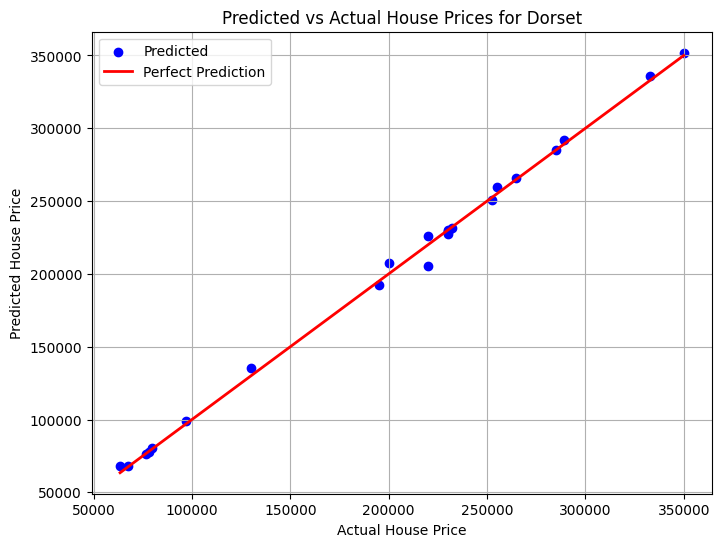

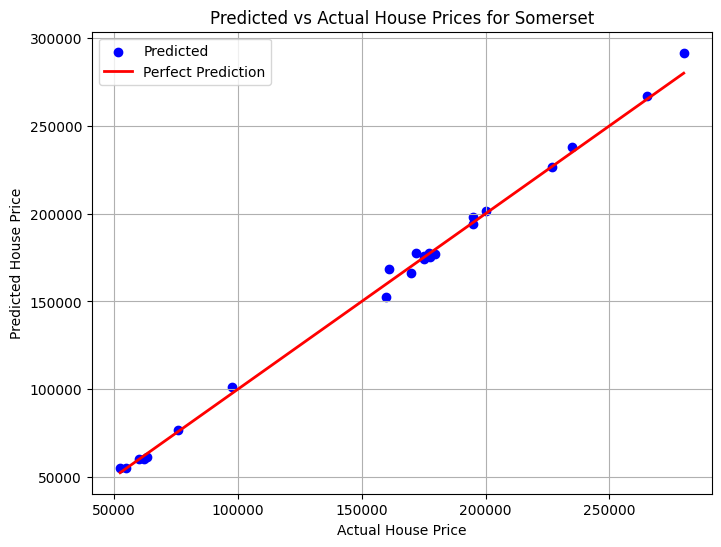

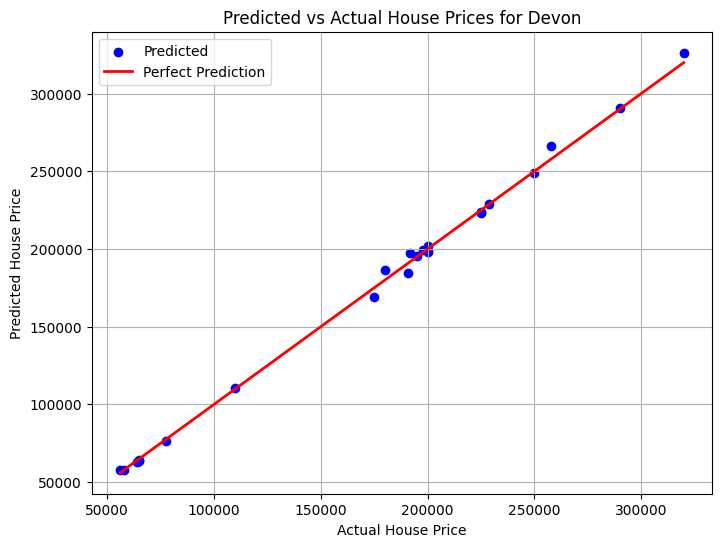

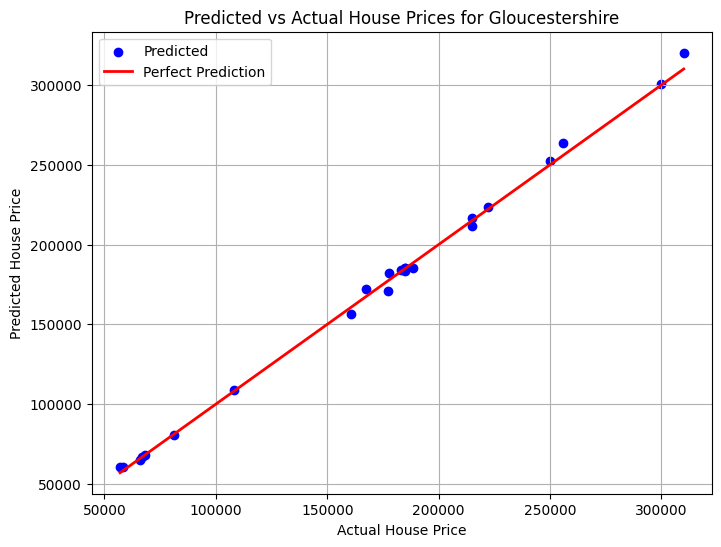

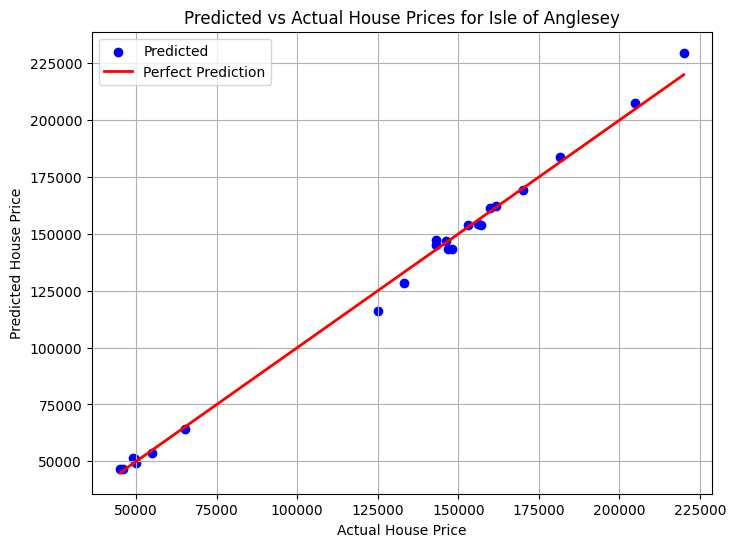

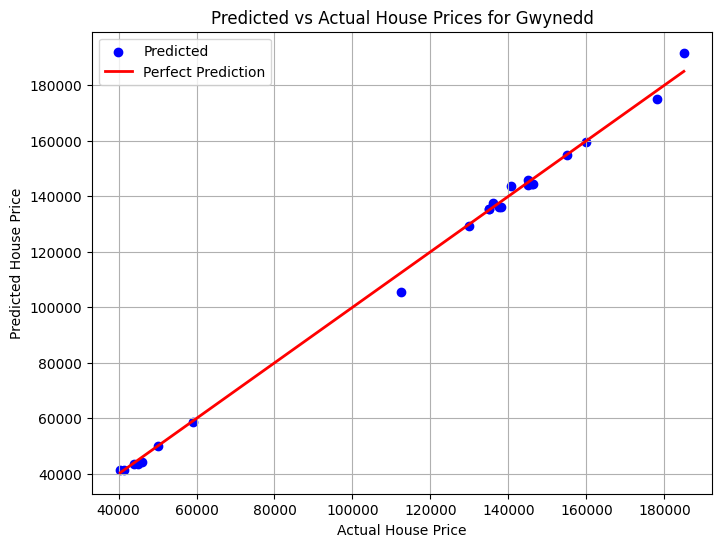

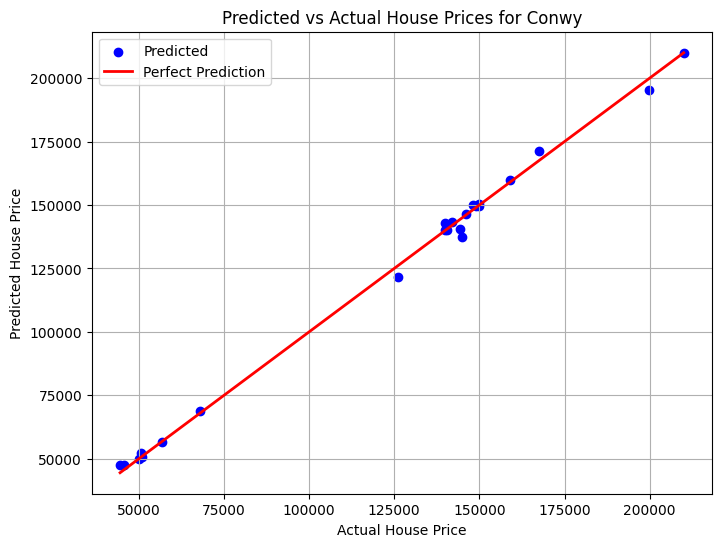

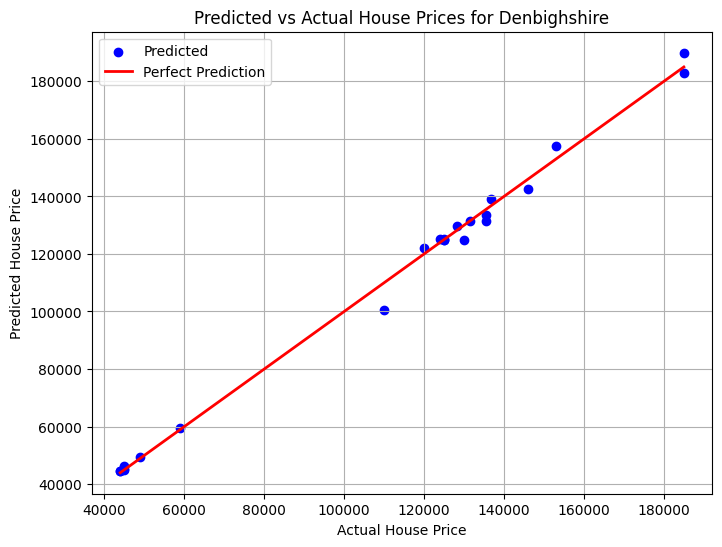

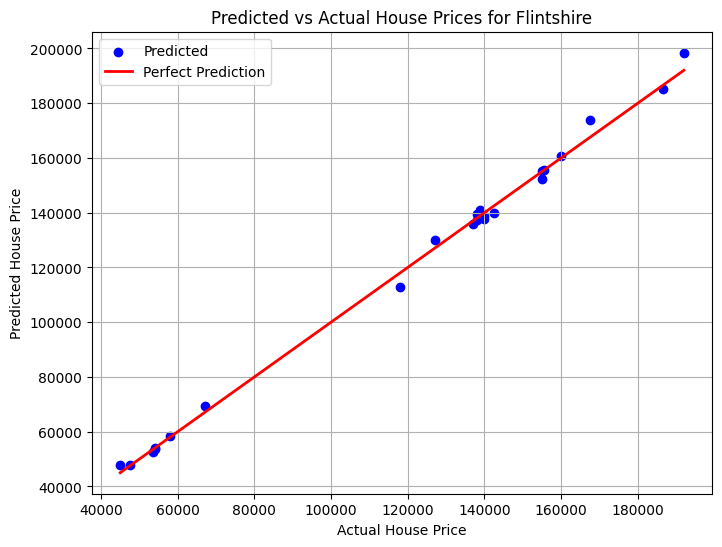

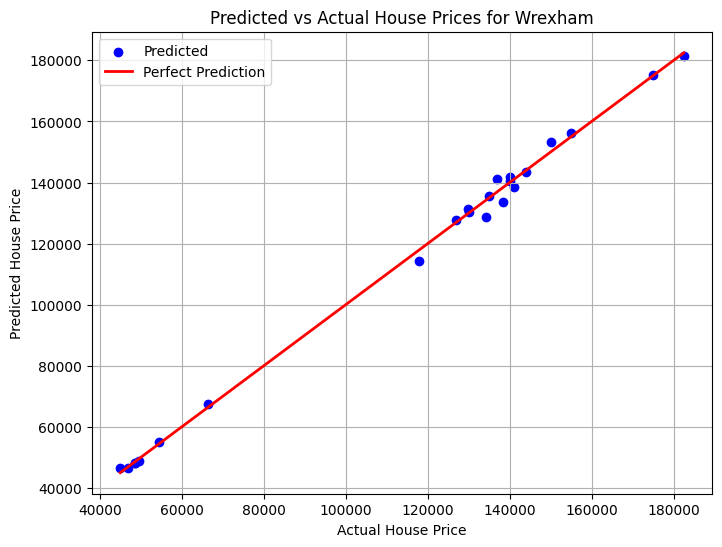

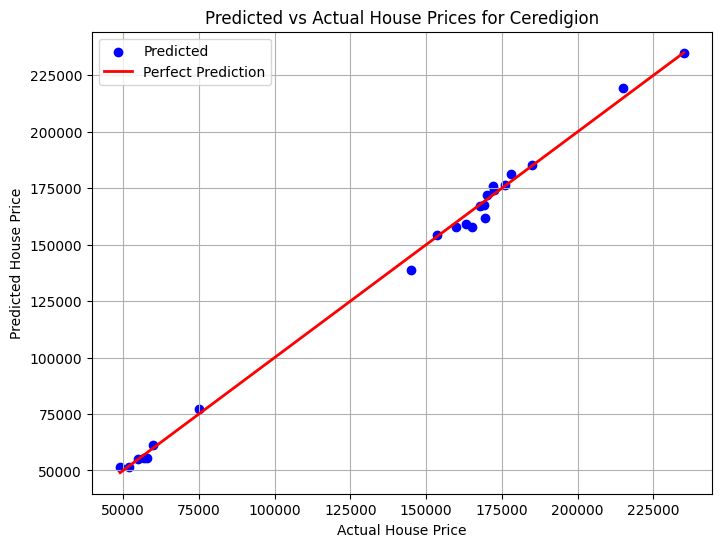

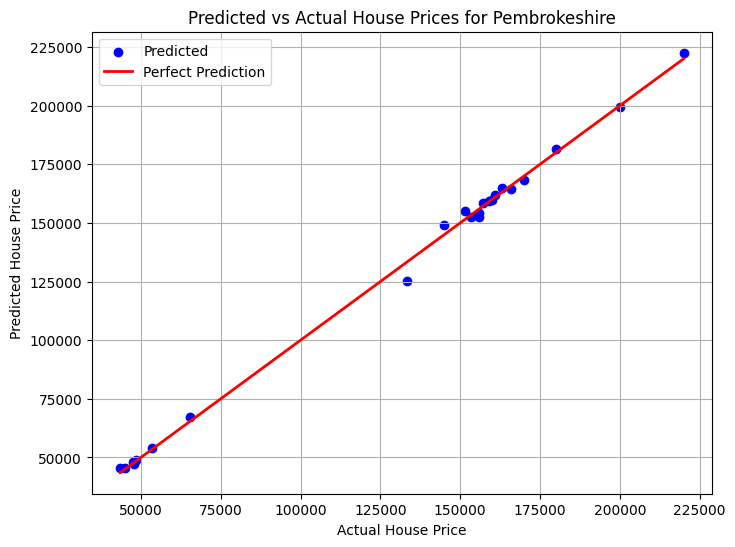

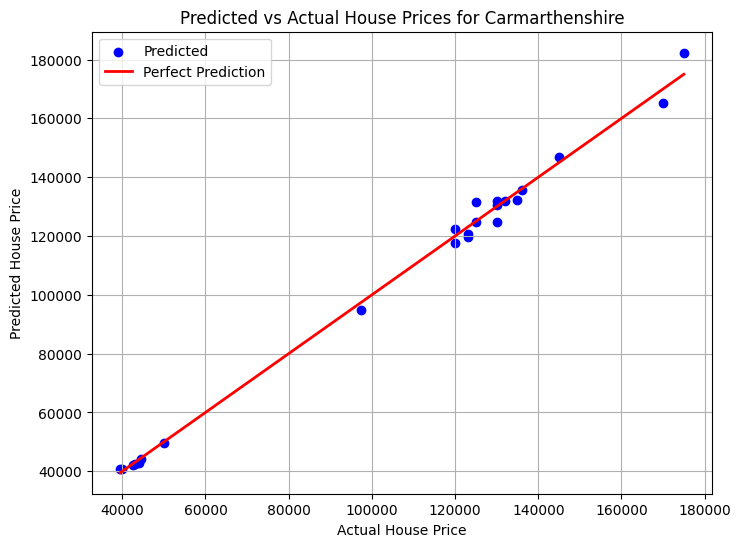

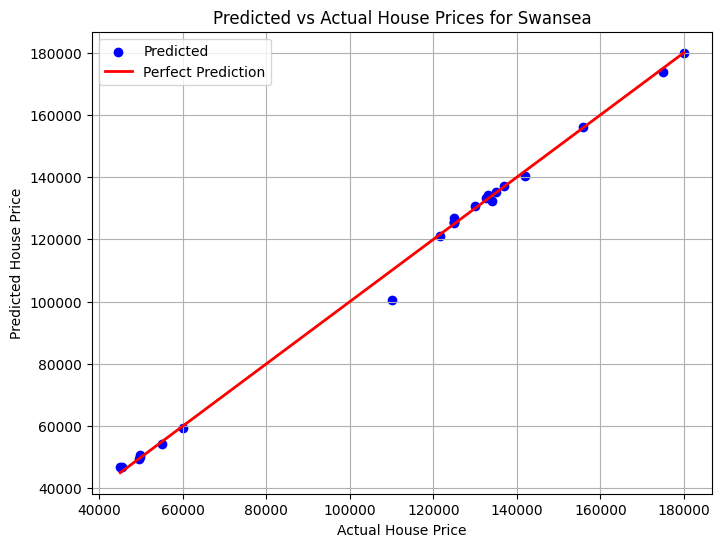

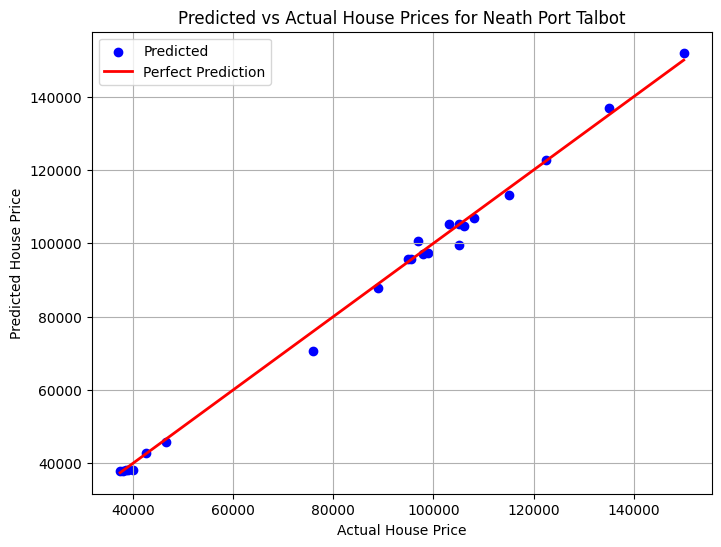

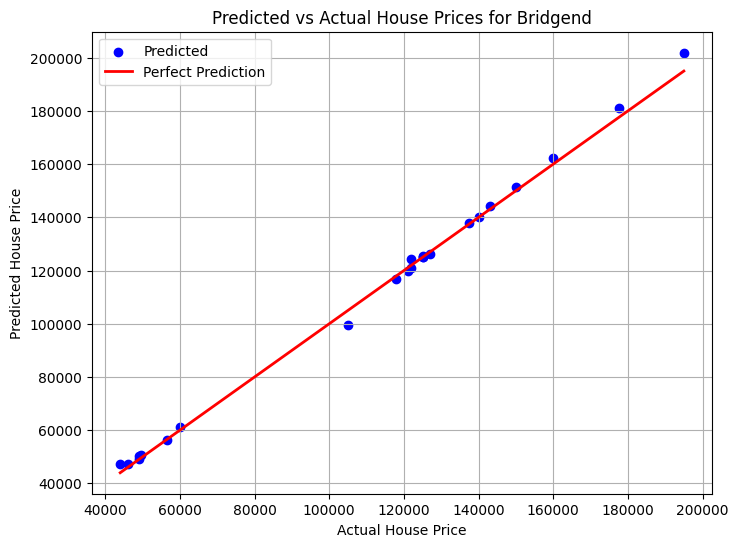

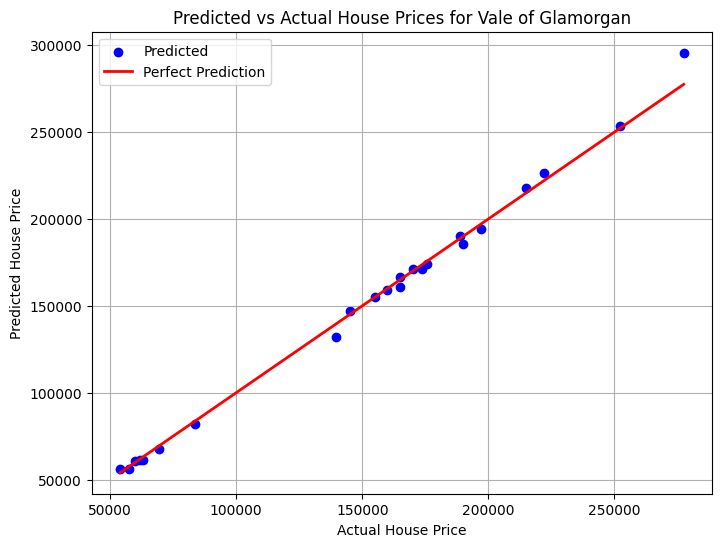

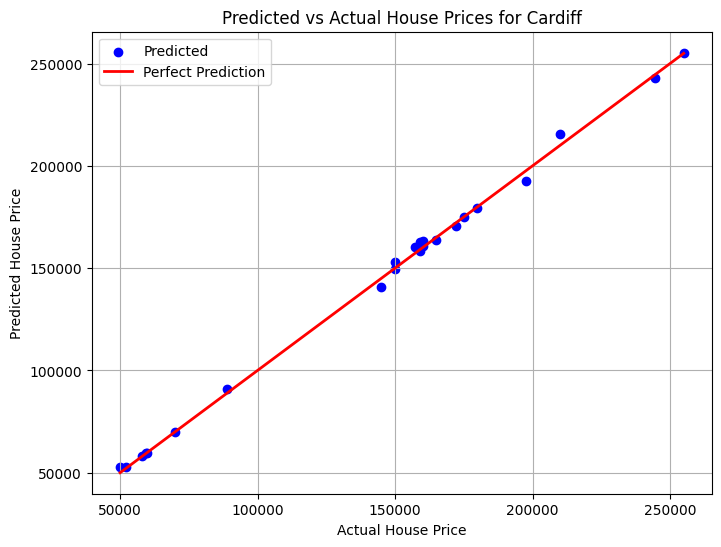

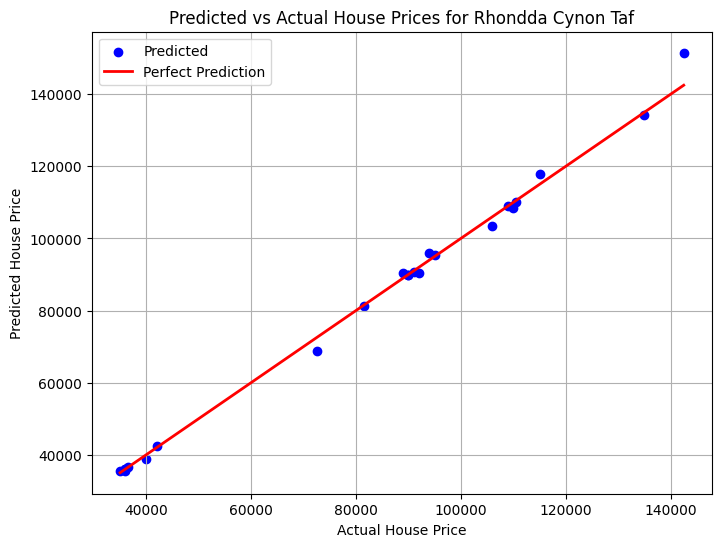

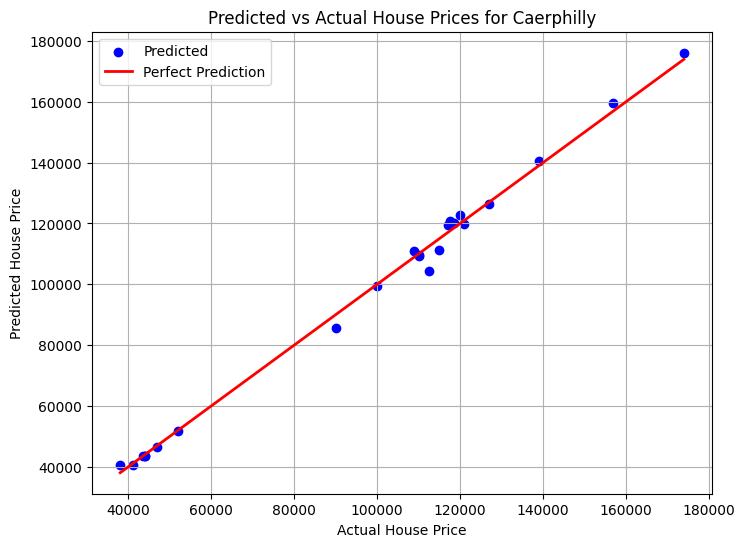

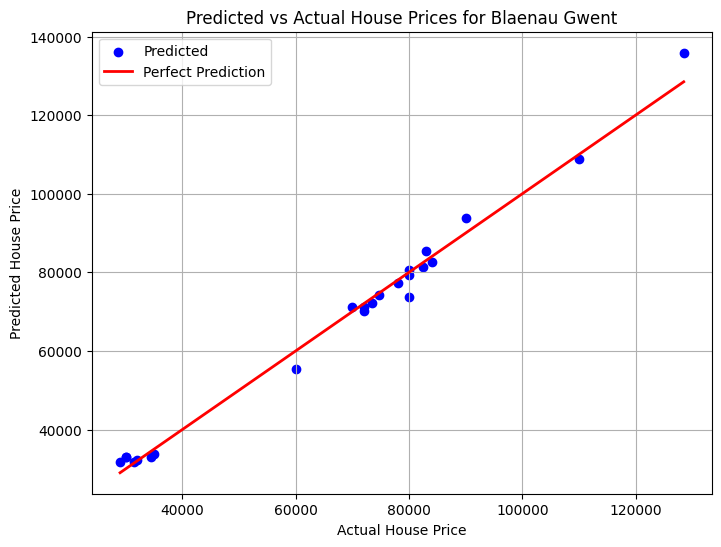

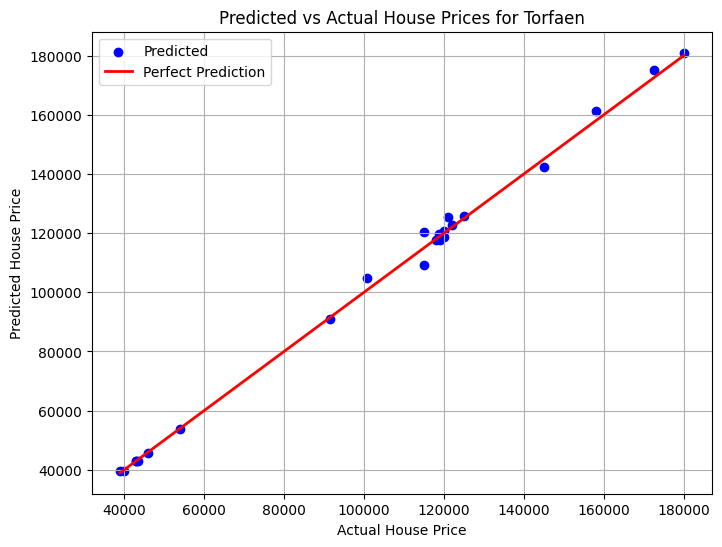

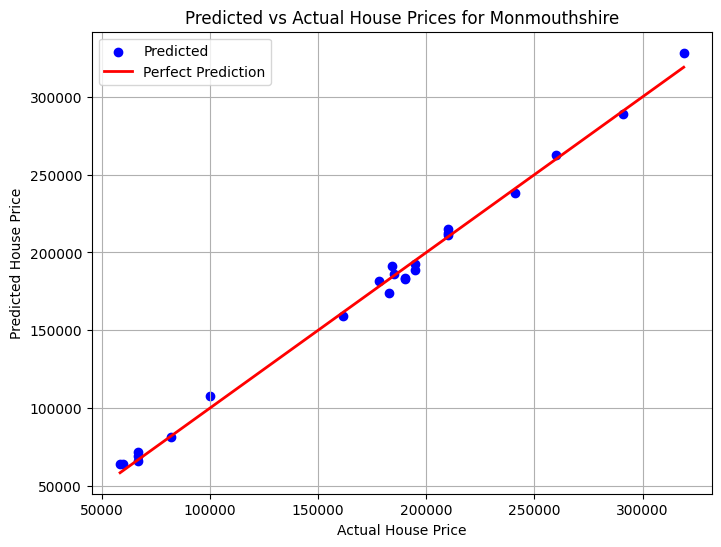

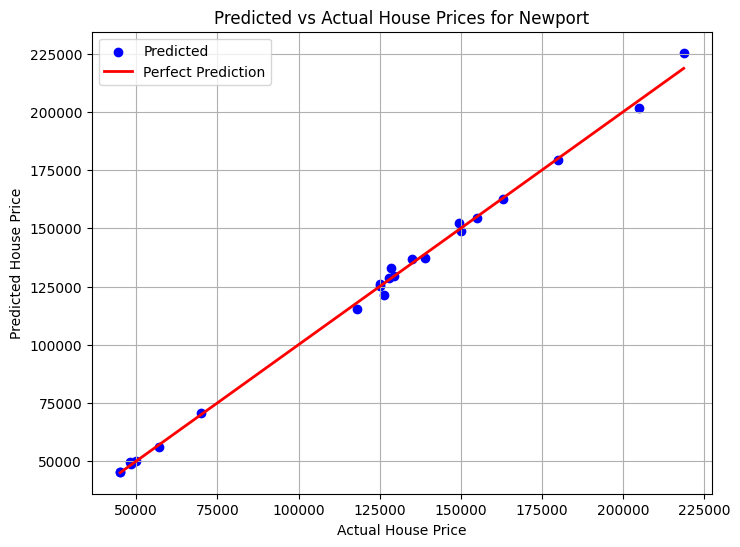

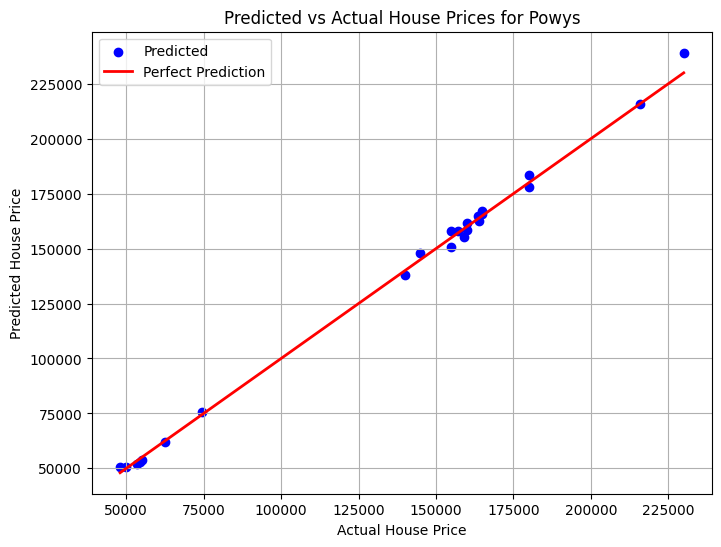

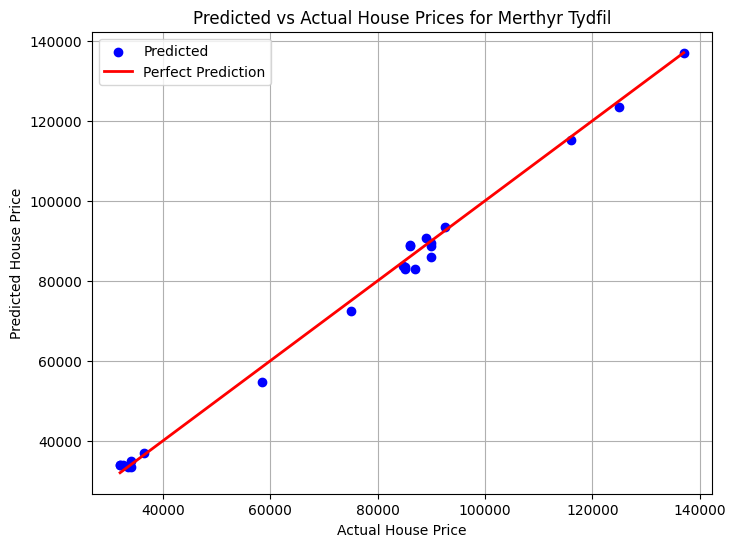

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
df['County name'] = label_encoder.fit_transform(df['County name'])

# Regression modeling: XGBoost regression
models = {}
predictions = {}
for county in df['County name'].unique():
    # Data for the specific county
    county_data = df[df['County name'] == county]

    # Split into training and testing sets
    X_county = county_data[['Year', 'Month']]
    y_county = county_data['House Price']

    # Split data to 80% train and 20% test 
    X_train, X_test, y_train, y_test = train_test_split(X_county, y_county, test_size=0.2, random_state=42)

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)  
    models[county] = model
    predictions[county] = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions[county], color='blue', label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
    plt.title(f'Predicted vs Actual House Prices for {label_encoder.inverse_transform([county])[0]}')
    plt.xlabel('Actual House Price')
    plt.ylabel('Predicted House Price')
    plt.legend()
    plt.grid()
    plt.show()

In [280]:
year_2024 = 2024
months_to_predict = [6, 9, 12]
new_data = np.array([[year_2024, month] for month in months_to_predict])
new_data = np.vstack((new_data, np.array([2025,3])))
print(new_data)

[[2024    6]
 [2024    9]
 [2024   12]
 [2025    3]]


# Evaluation

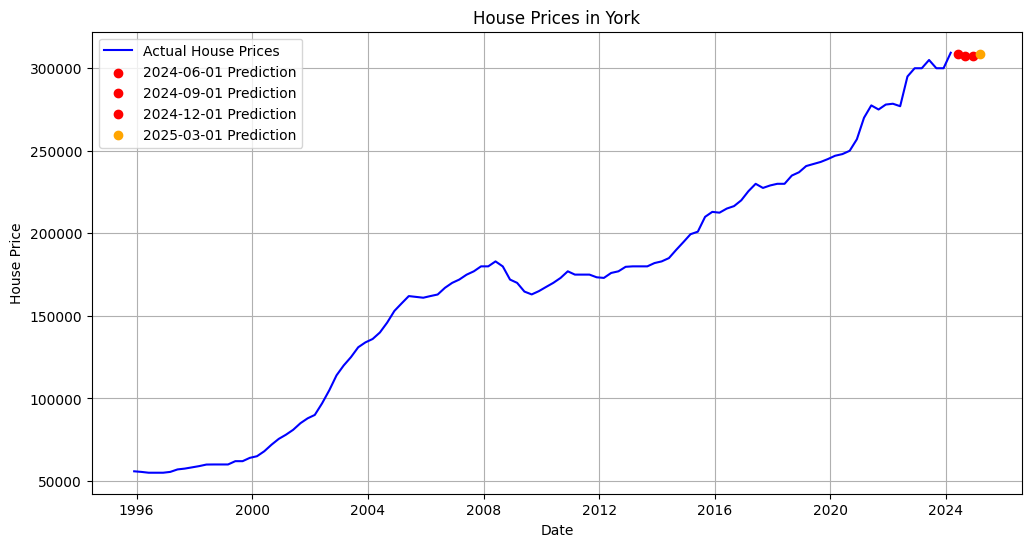

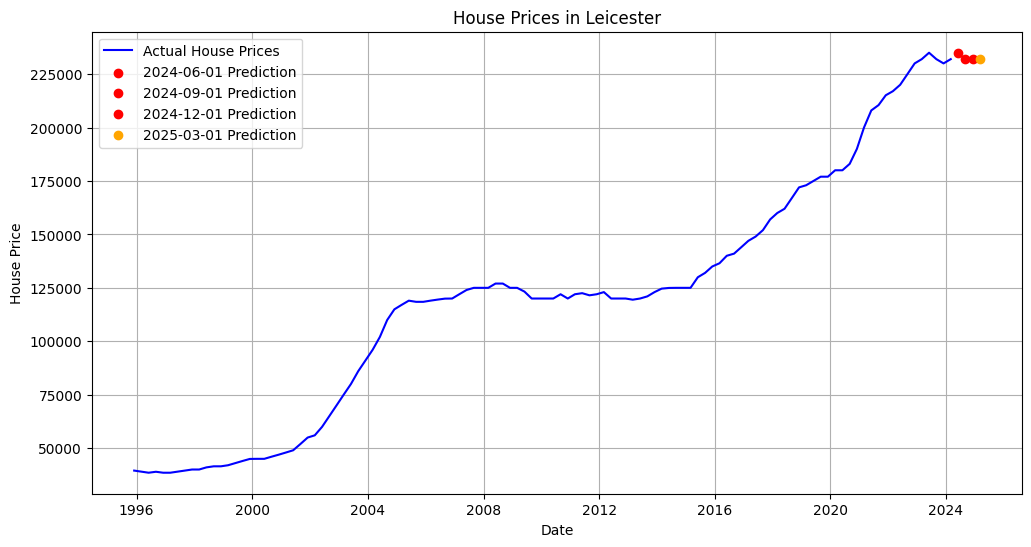

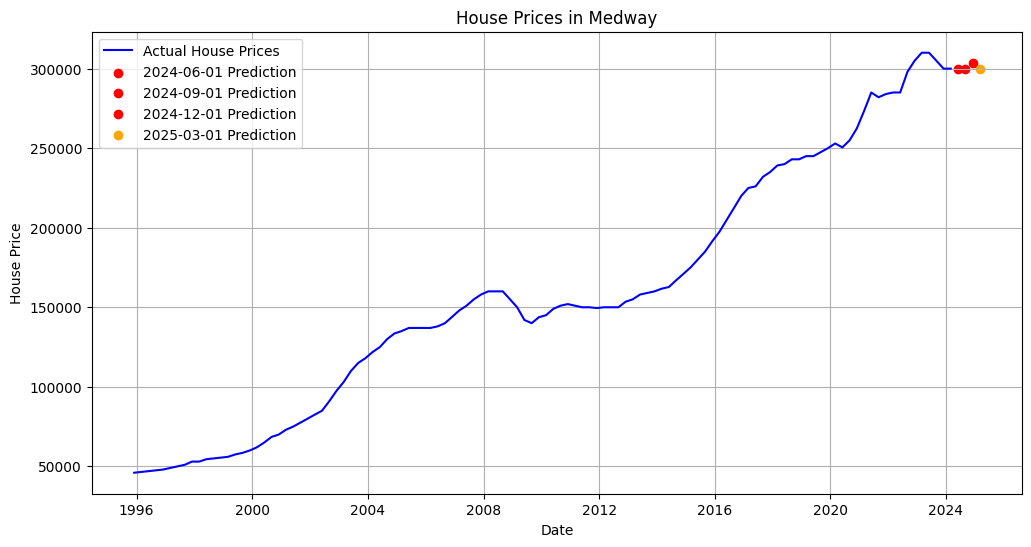

Plots saved for each county.


In [281]:
predicted_prices = {}
for county, model in models.items():
    predicted_price = model.predict(new_data)
    predicted_prices[label_encoder.inverse_transform([county])[0]] = predicted_price

    # Prepare actual prices for the current county for plotting
    actual_prices = df_copy[df_copy['County name'] == label_encoder.inverse_transform([county])[0]]
    months_and_years = actual_prices['Year']

    # Create new plot for each county
    plt.figure(figsize=(12, 6))
    plt.plot(months_and_years, actual_prices['House Price'], label='Actual House Prices', color='blue')

    # Plot predictions for the specified months
    for i, month in enumerate(months_to_predict):
        new_date = pd.to_datetime(f'2024-{month:02d}-01')
        plt.scatter(new_date, predicted_price[i], color='red', label=f'2024-{month:02d}-01 Prediction')

    new_date_2025 = pd.to_datetime('2025-03-01')
    plt.scatter(new_date_2025, predicted_price[-1], color='orange', label='2025-03-01 Prediction')

    # Add labels and title
    plt.title(f'House Prices in {label_encoder.inverse_transform([county])[0]}')
    plt.xlabel('Date')
    plt.ylabel('House Price')
    plt.legend()
    plt.grid()

    # Use the below code to save the plot for every county
    # plt.savefig(f'House_Price_Prediction_{label_encoder.inverse_transform([county])[0]}_2024.png')

    # Below code is an example for three counties
    if label_encoder.inverse_transform([county])[0] == 'York':
        plt.show()
    elif label_encoder.inverse_transform([county])[0] == 'Leicester':
        plt.show()
    elif label_encoder.inverse_transform([county])[0] == 'Medway':
        plt.show()

    plt.close()  

print("Plots saved for each county.")

In [282]:
predicted_prices["York"]

array([308876.44, 307474.12, 307474.12, 308876.44], dtype=float32)

In [283]:
predicted_prices["Leicester"]

array([234646.53, 231960.56, 231960.56, 231962.47], dtype=float32)

In [284]:
predicted_prices["Medway"]

array([299947.66, 299947.66, 303586.06, 299947.66], dtype=float32)

In [285]:
pred_2025 = {}
for county, preds in predicted_prices.items():
    pred_2025[county] = preds[3]

print(pred_2025)

{'Hartlepool': 137734.84, 'Middlesbrough': 145011.95, 'Redcar and Cleveland': 157849.81, 'Stockton-on-Tees': 161017.08, 'Darlington': 157486.5, 'County Durham': 124991.414, 'Northumberland': 195171.94, 'Tyne and Wear': 165027.31, 'Halton': 164971.61, 'Warrington': 241973.39, 'Blackburn with Darwen': 138229.33, 'Blackpool': 132988.72, 'Cheshire East': 274947.12, 'Cheshire West and Chester': 242733.38, 'Cumberland': 154968.52, 'Westmorland and Furness': 229926.48, 'Lancashire': 180976.55, 'Greater Manchester': 219970.11, 'Merseyside': 184978.66, 'Kingston upon Hull, City of': 129001.2, 'East Riding of Yorkshire': 219938.72, 'North East Lincolnshire': 154990.16, 'North Lincolnshire': 167983.33, 'York': 308876.44, 'North Yorkshire': 262489.2, 'South Yorkshire': 175731.78, 'West Yorkshire': 194987.92, 'Derby': 199952.88, 'Leicester': 231962.47, 'Rutland': 360055.28, 'Nottingham': 186413.77, 'North Northamptonshire': 249958.14, 'West Northamptonshire': 289975.3, 'Derbyshire': 219985.03, 'Lei

In [286]:
import csv
with open("pred_2025.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["County", "House Price"]) 
    for county, price in pred_2025.items():
        writer.writerow([county, price])  